# Predict electricity prices per hour from one year historical data

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score

In [357]:
train_df = pd.read_excel(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\Training Set.xlsx")
test_df = pd.read_excel(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\Test Set.xlsx")

In [15]:
train_df.describe()
train_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [268]:
#test_df.drop(['target'],axis=1,inplace=True)
train_df.isnull().sum() #no missing values
train_df['Weekday'].unique() 
train_df['Is Working Day'].unique()

#both are equal we can drop one column

train_df.drop(['Is Working Day'],axis=1,inplace=True)

In [269]:
train_df.reset_index(drop=True,inplace=True)
train_df.set_index('Date',inplace=True)

In [77]:
train_df_daily = train_df.resample('D')
daily_mean = train_df_daily.mean()
train_df_monthly = train_df.resample('M')
monthly_mean = train_df_monthly.mean()

## Check the range of data using boxplot

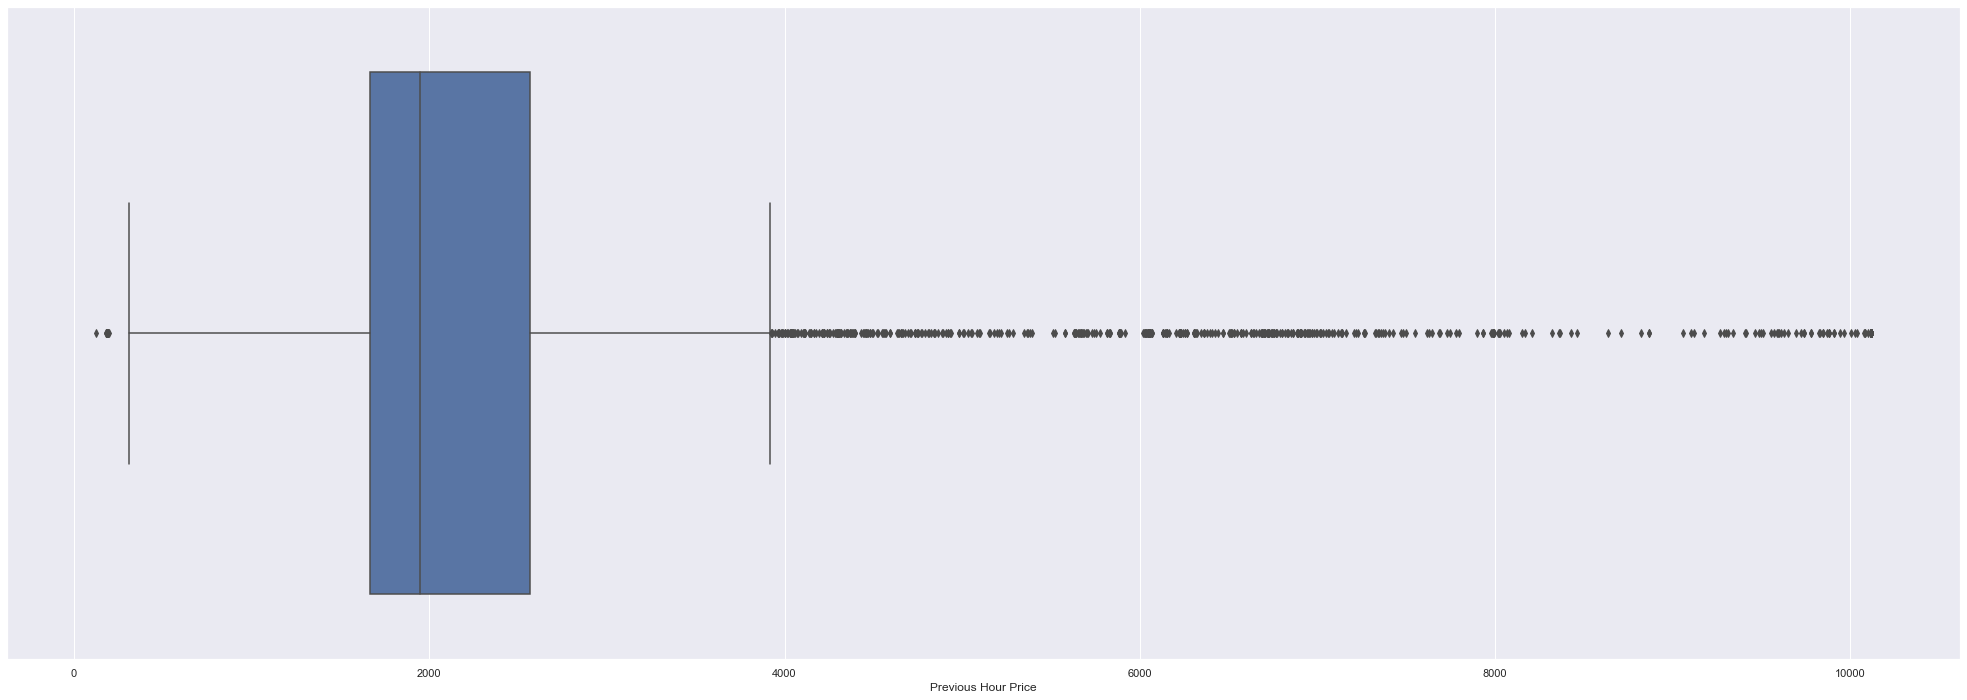

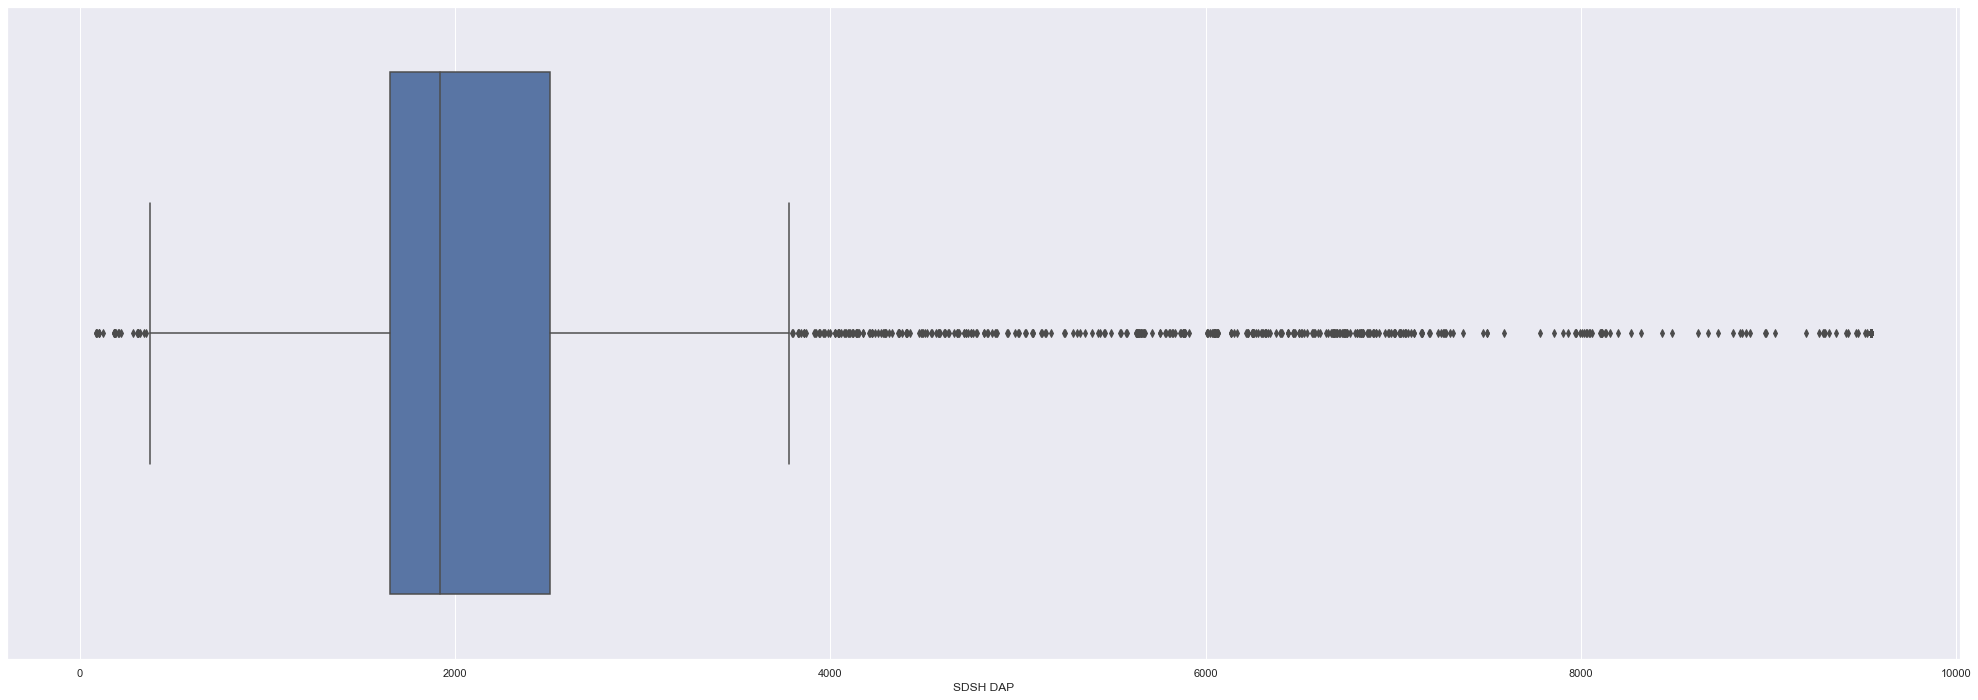

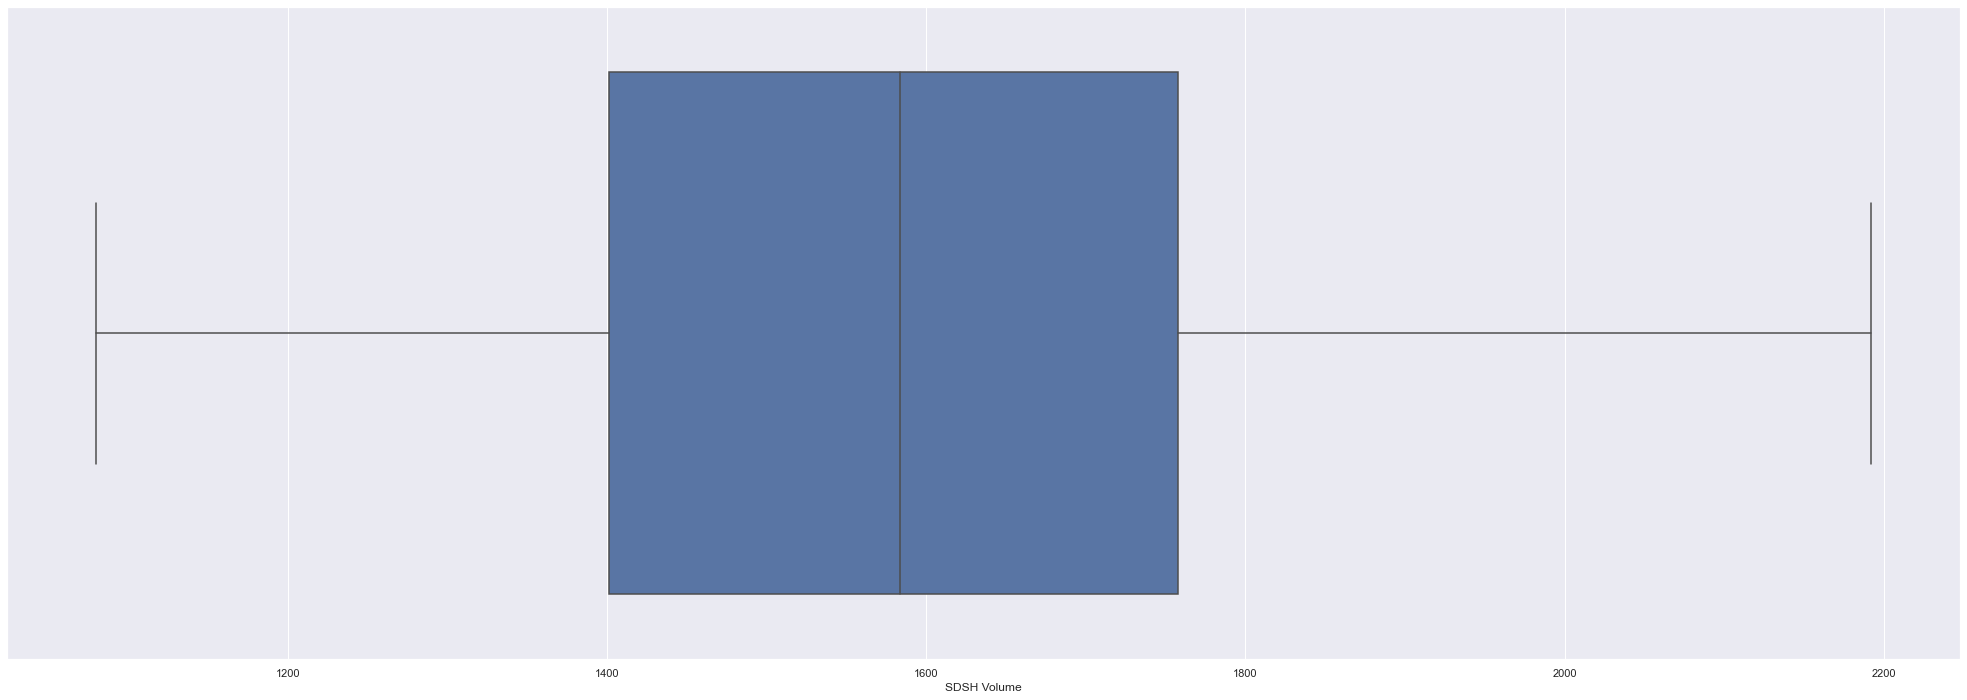

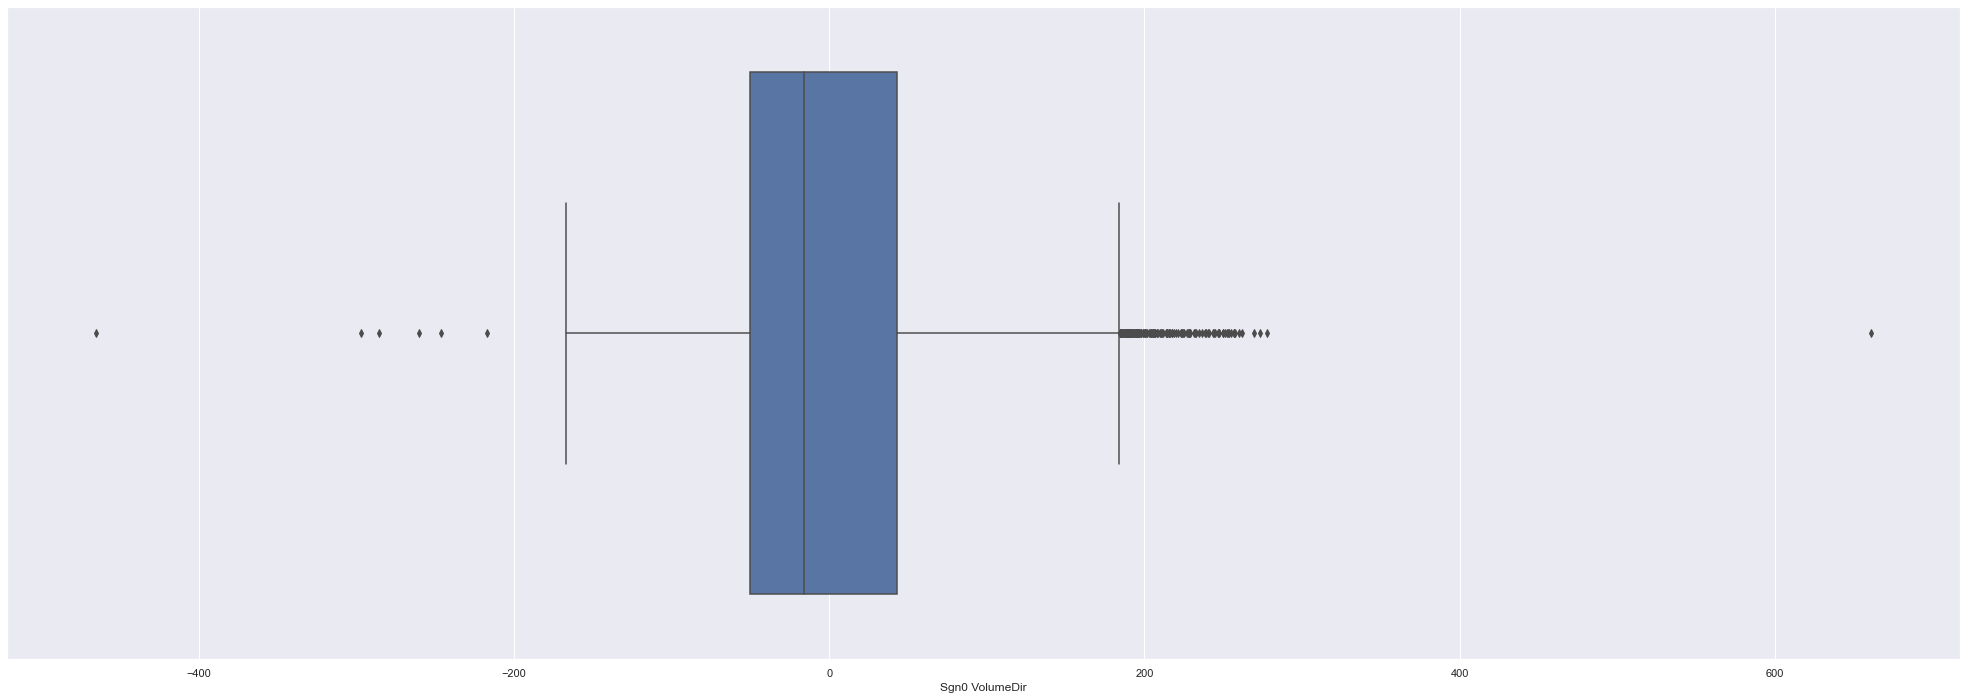

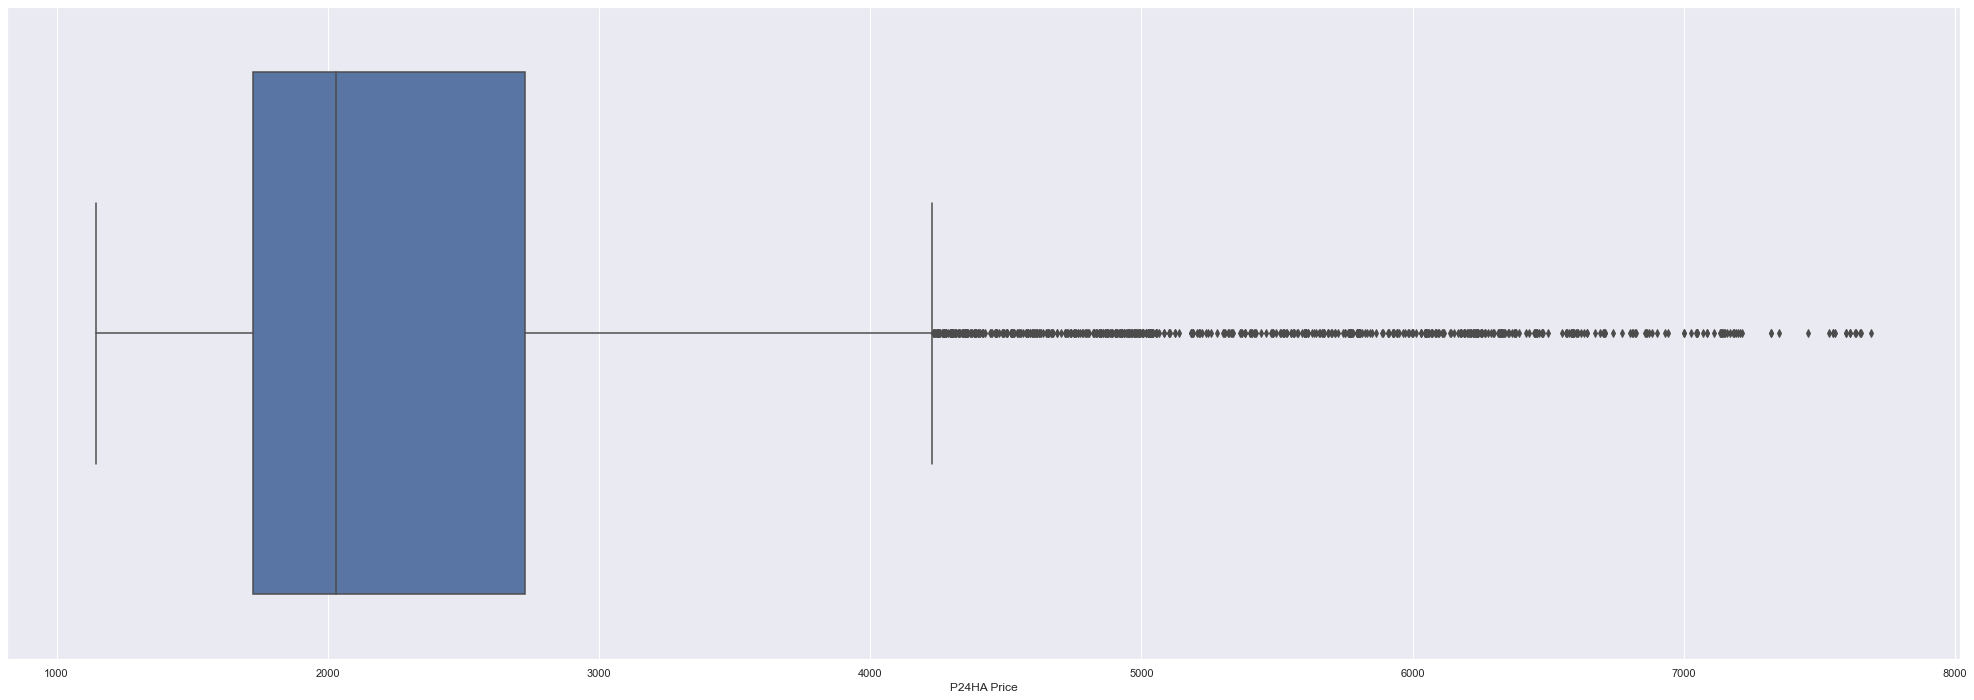

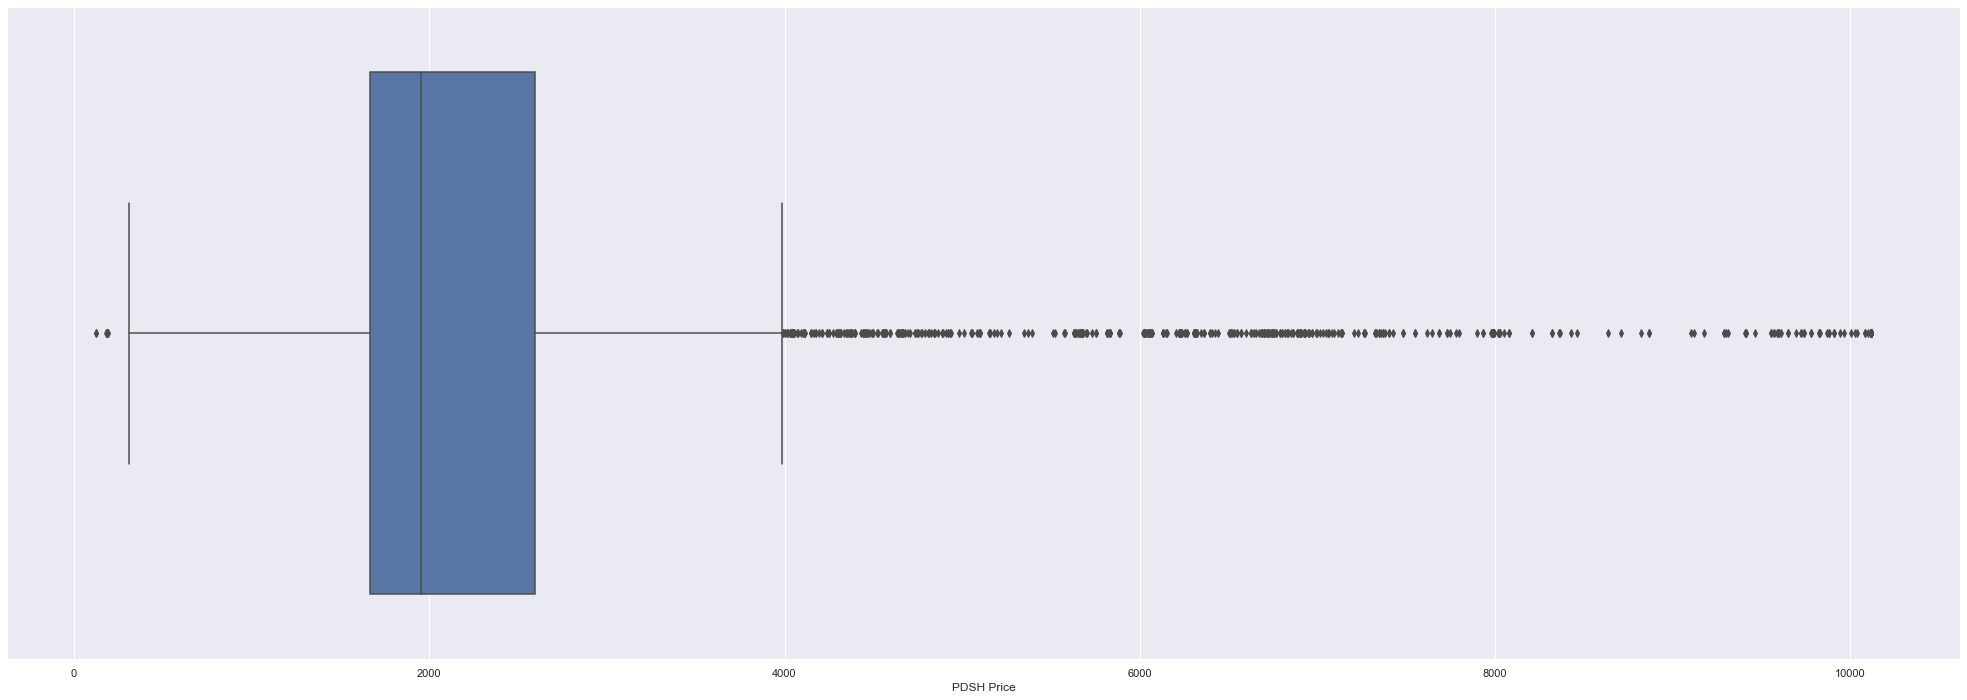

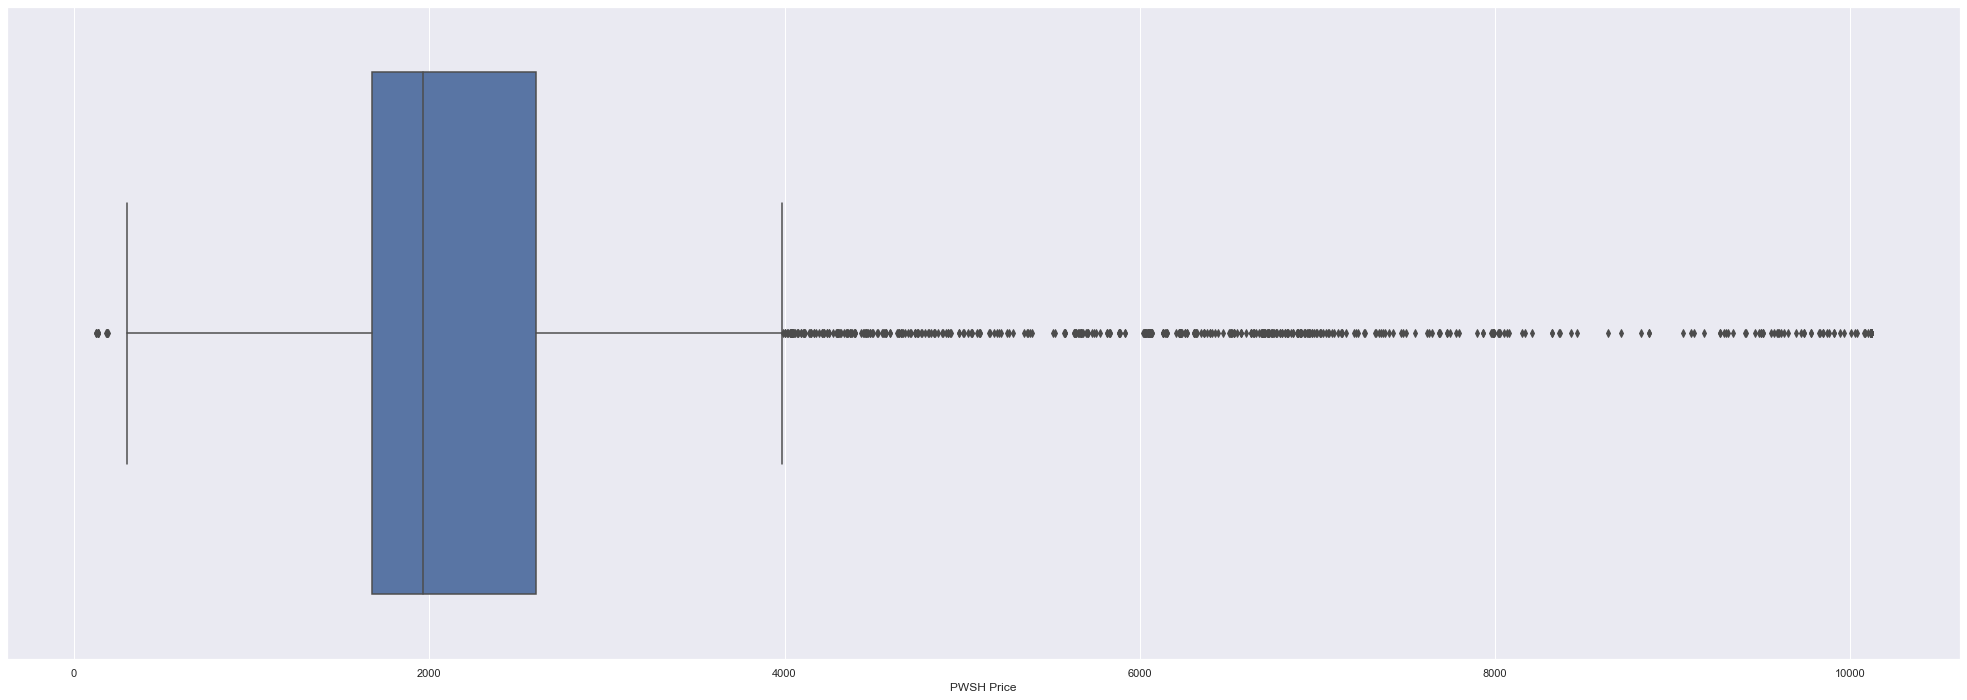

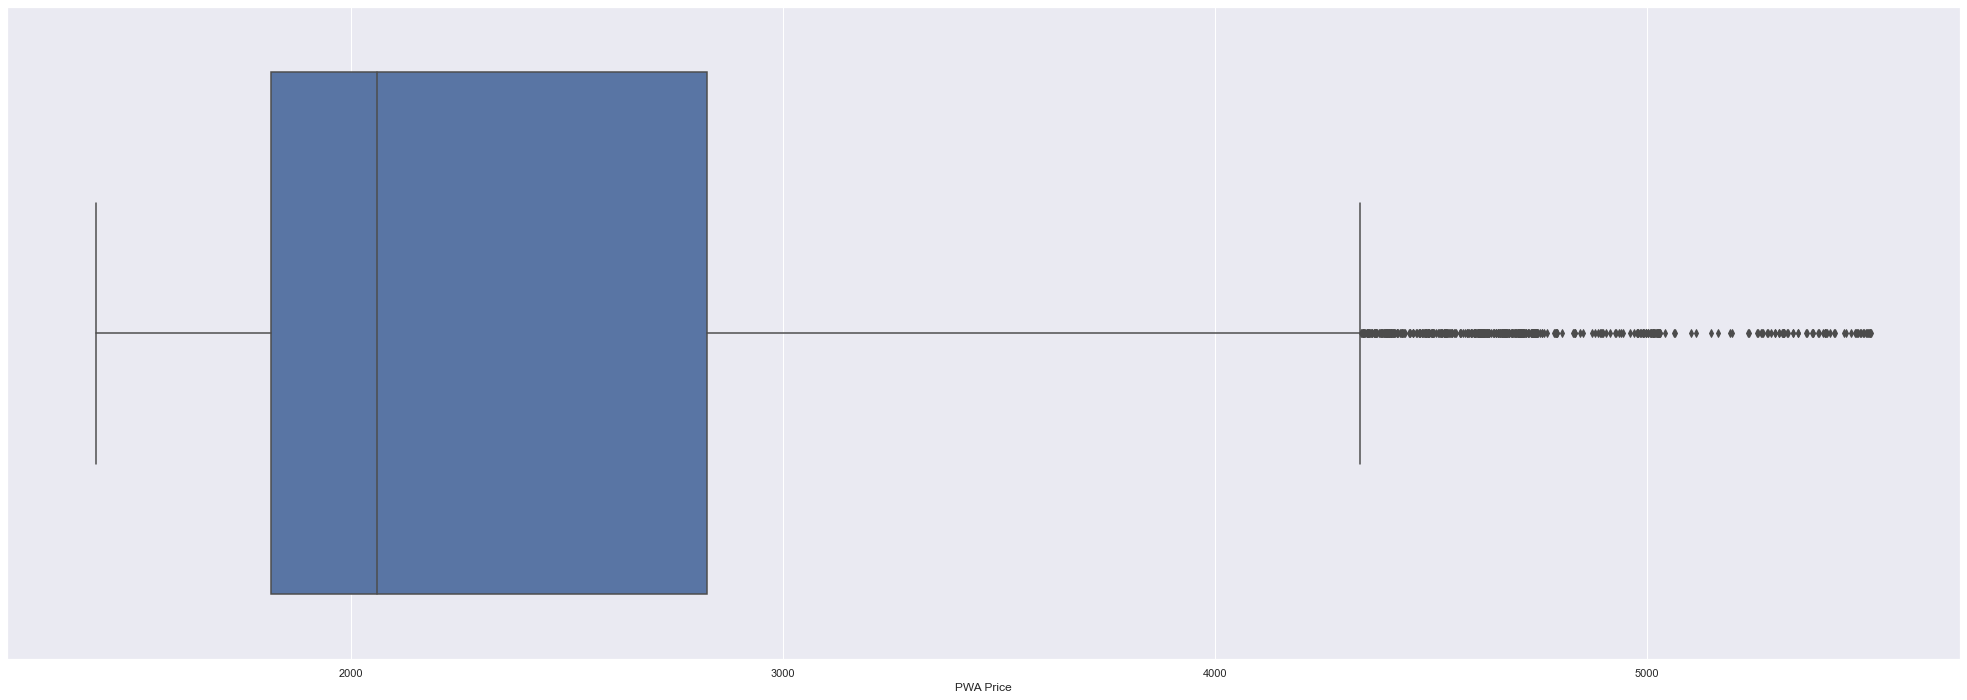

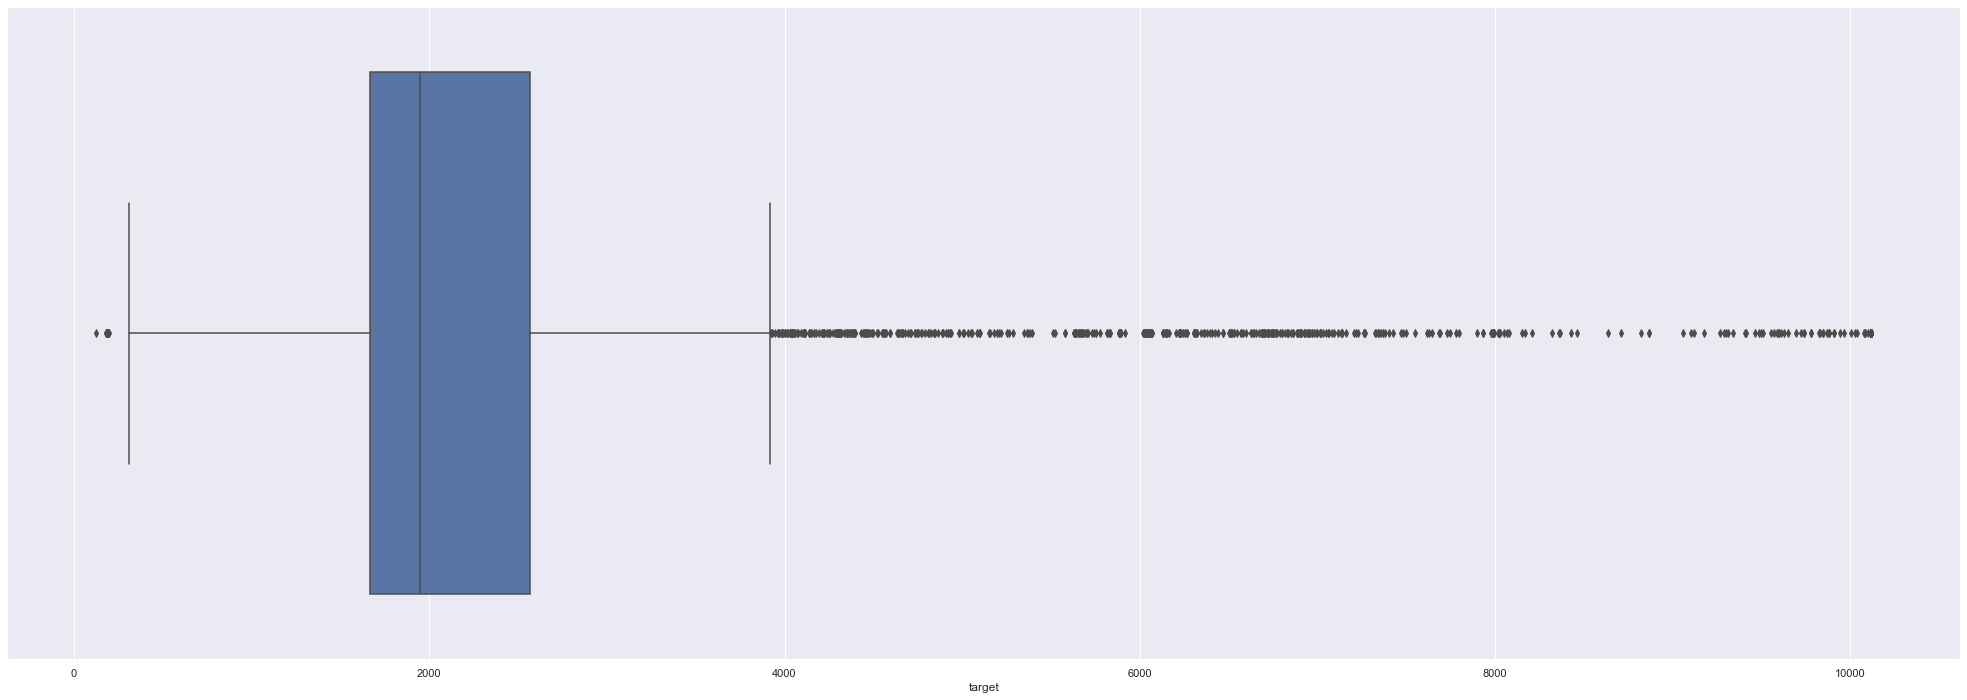

In [81]:
for col in train_df.iloc[:,3:]:
    sns.boxplot(x=train_df[col])
    plt.show()

## check for correlation

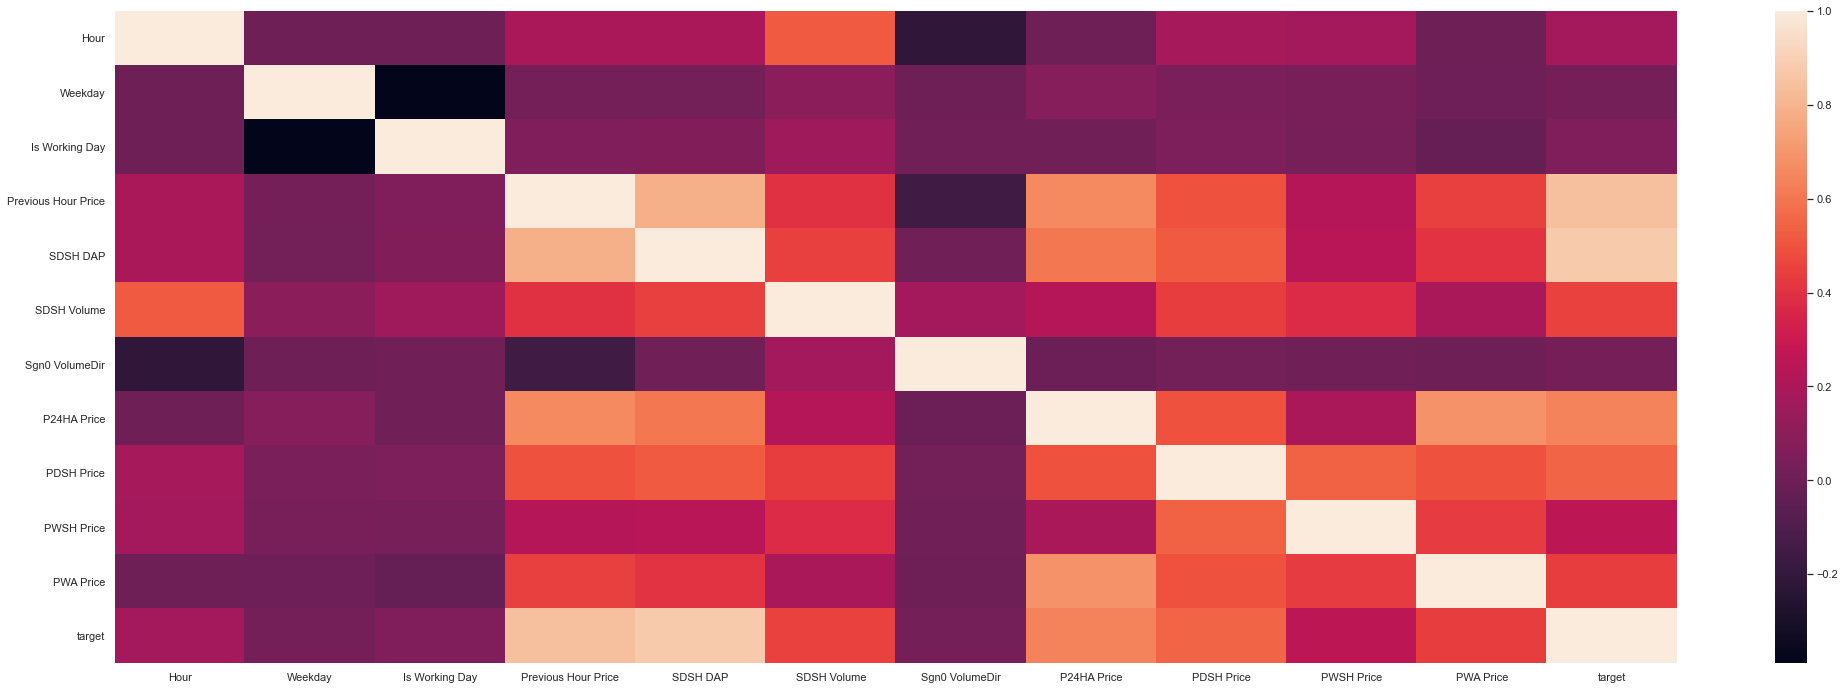

In [100]:
sns.heatmap(train_df.corr())

## remove  correlated feature

In [94]:
correlated_features = set()
correlation_matrix = train_df.iloc[:,:-1].corr()

threshold = 0.75

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j] > threshold):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features

{'SDSH DAP'}

## check th distribution of data

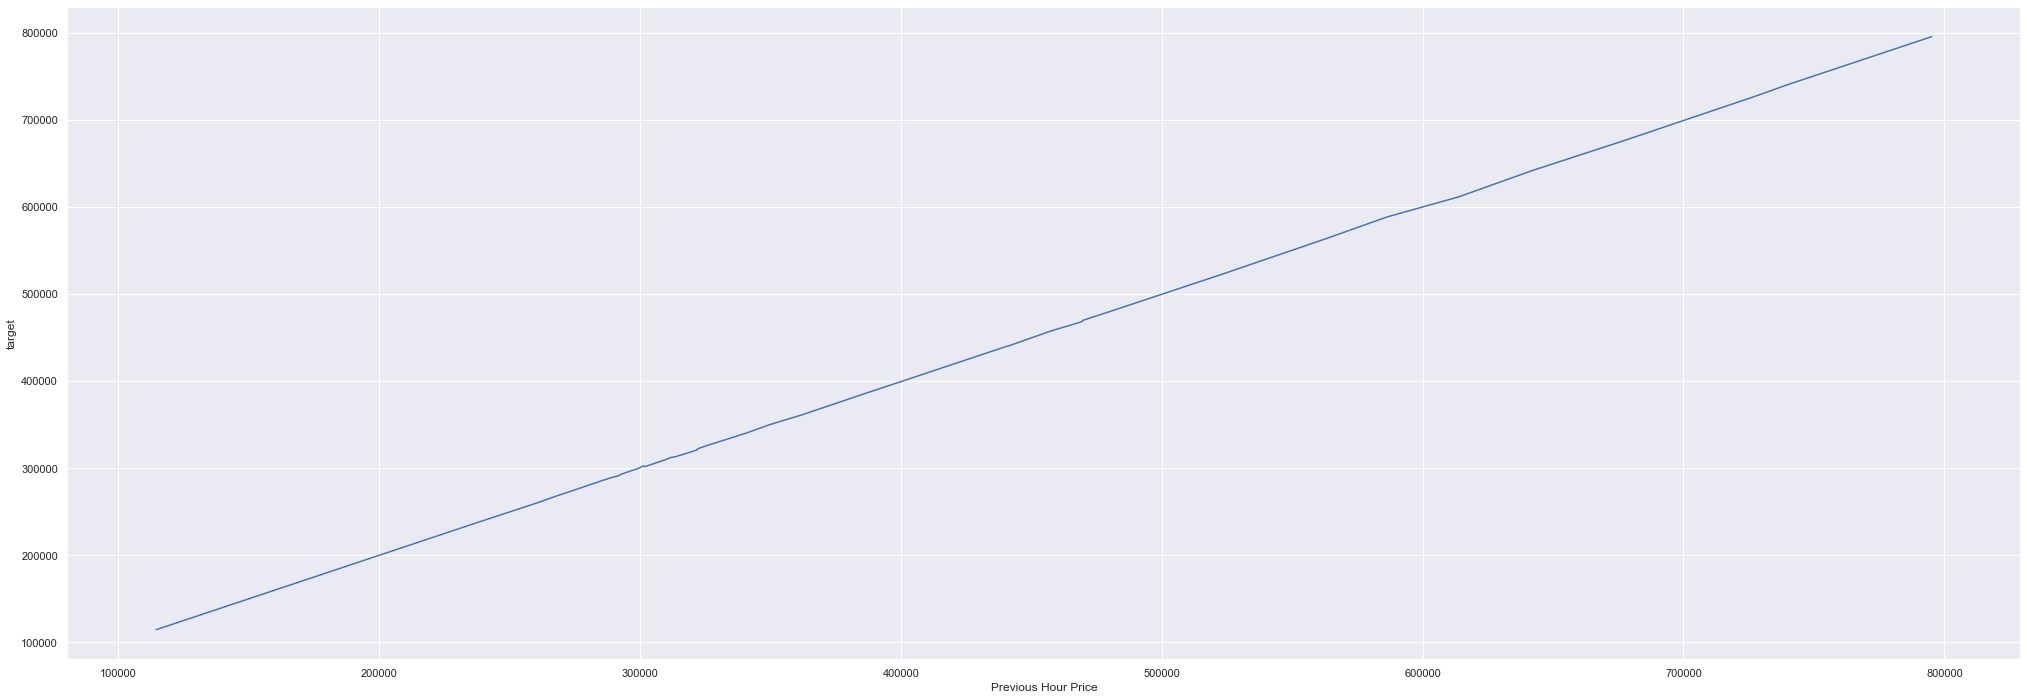

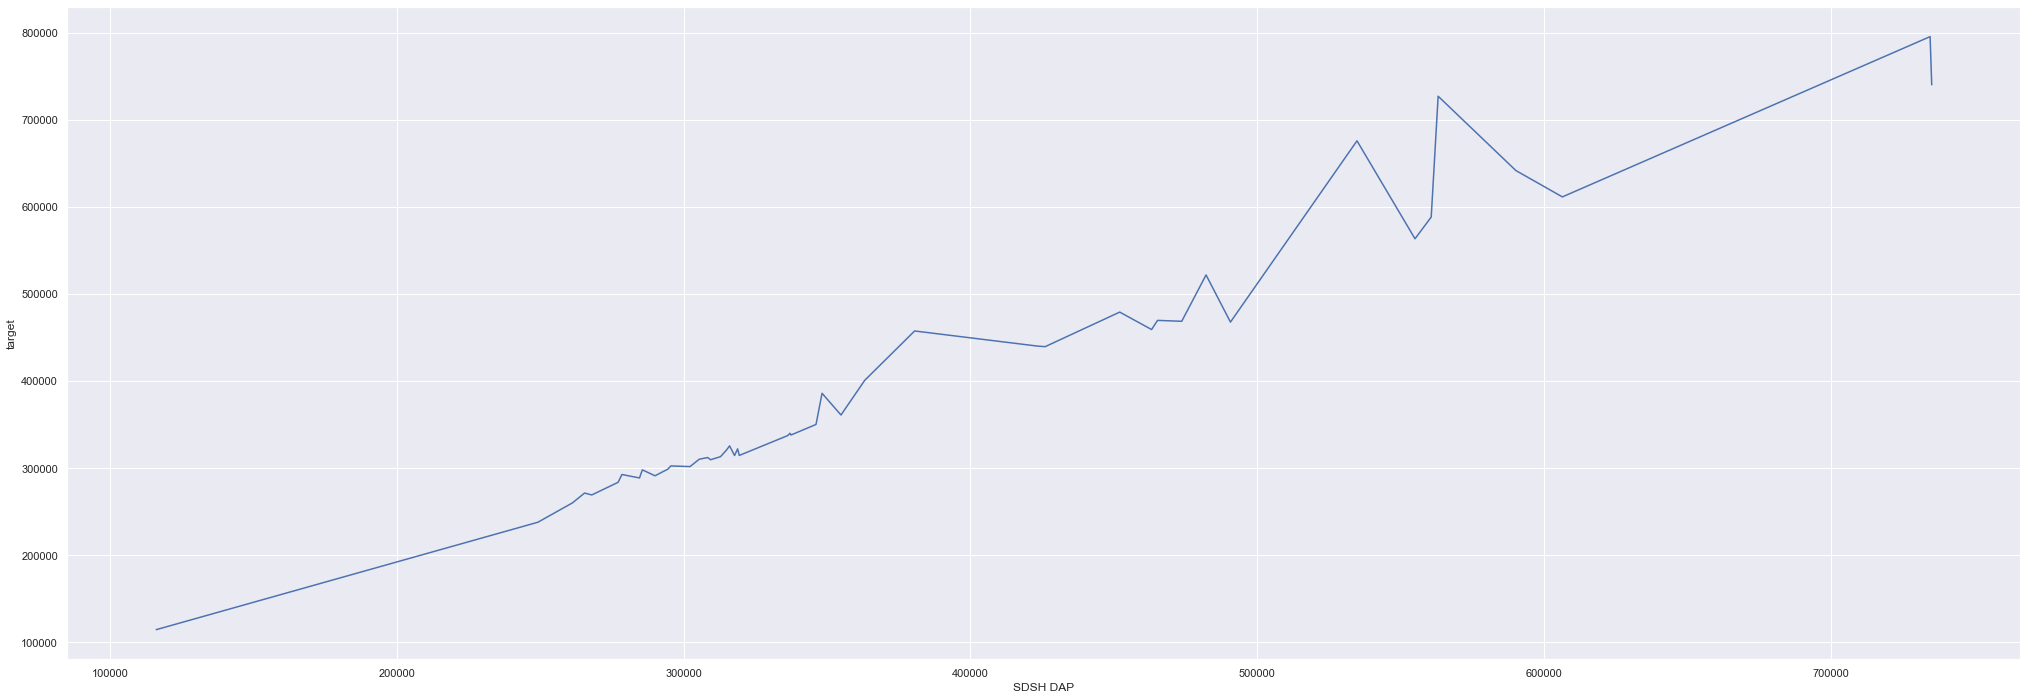

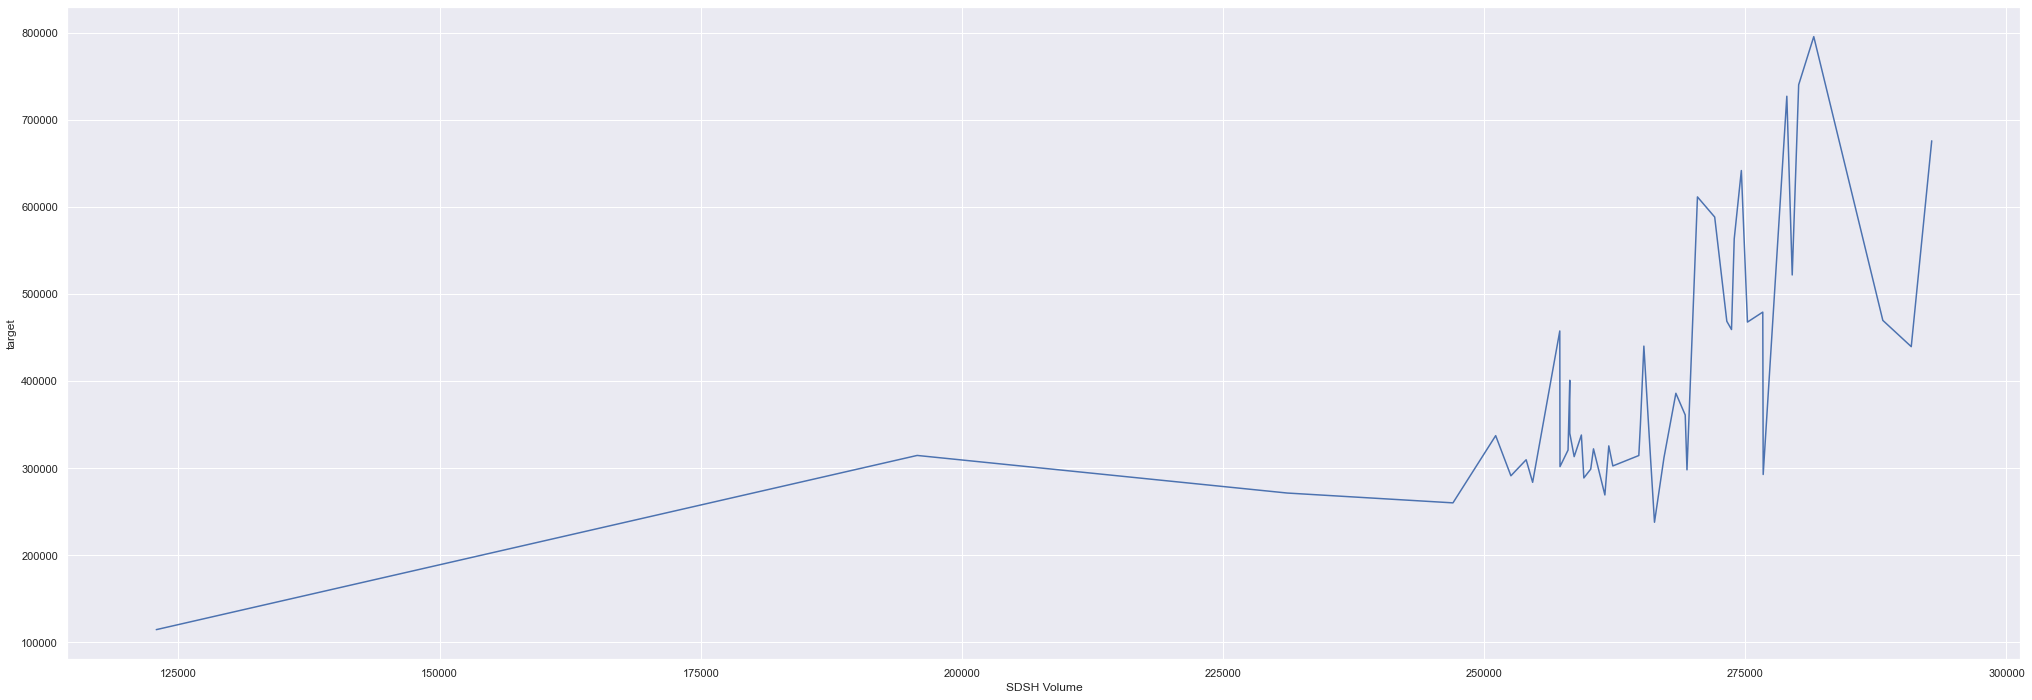

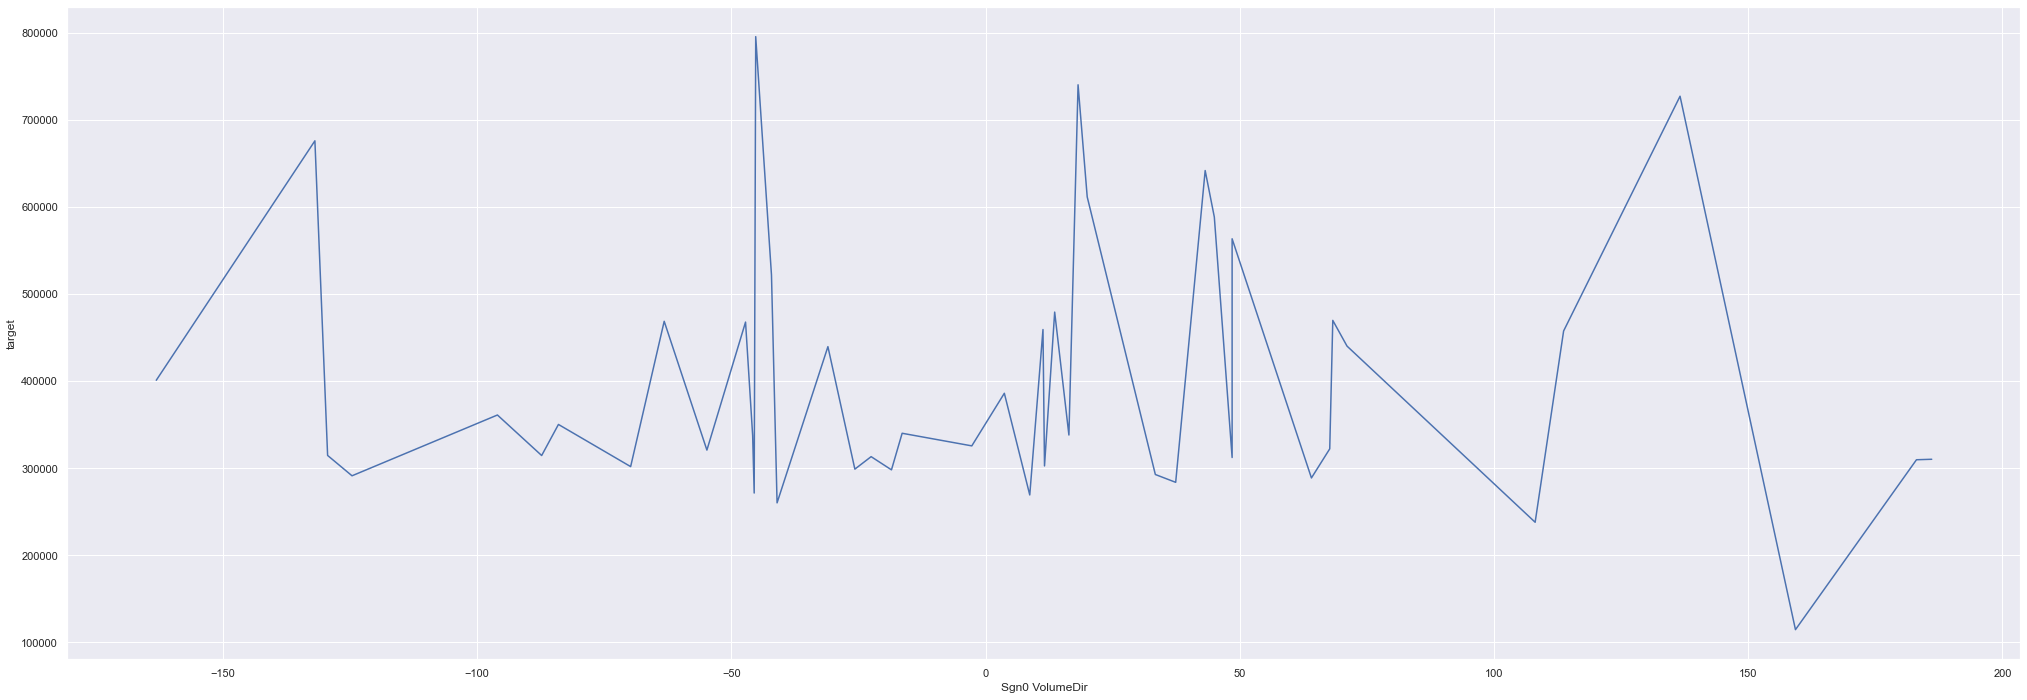

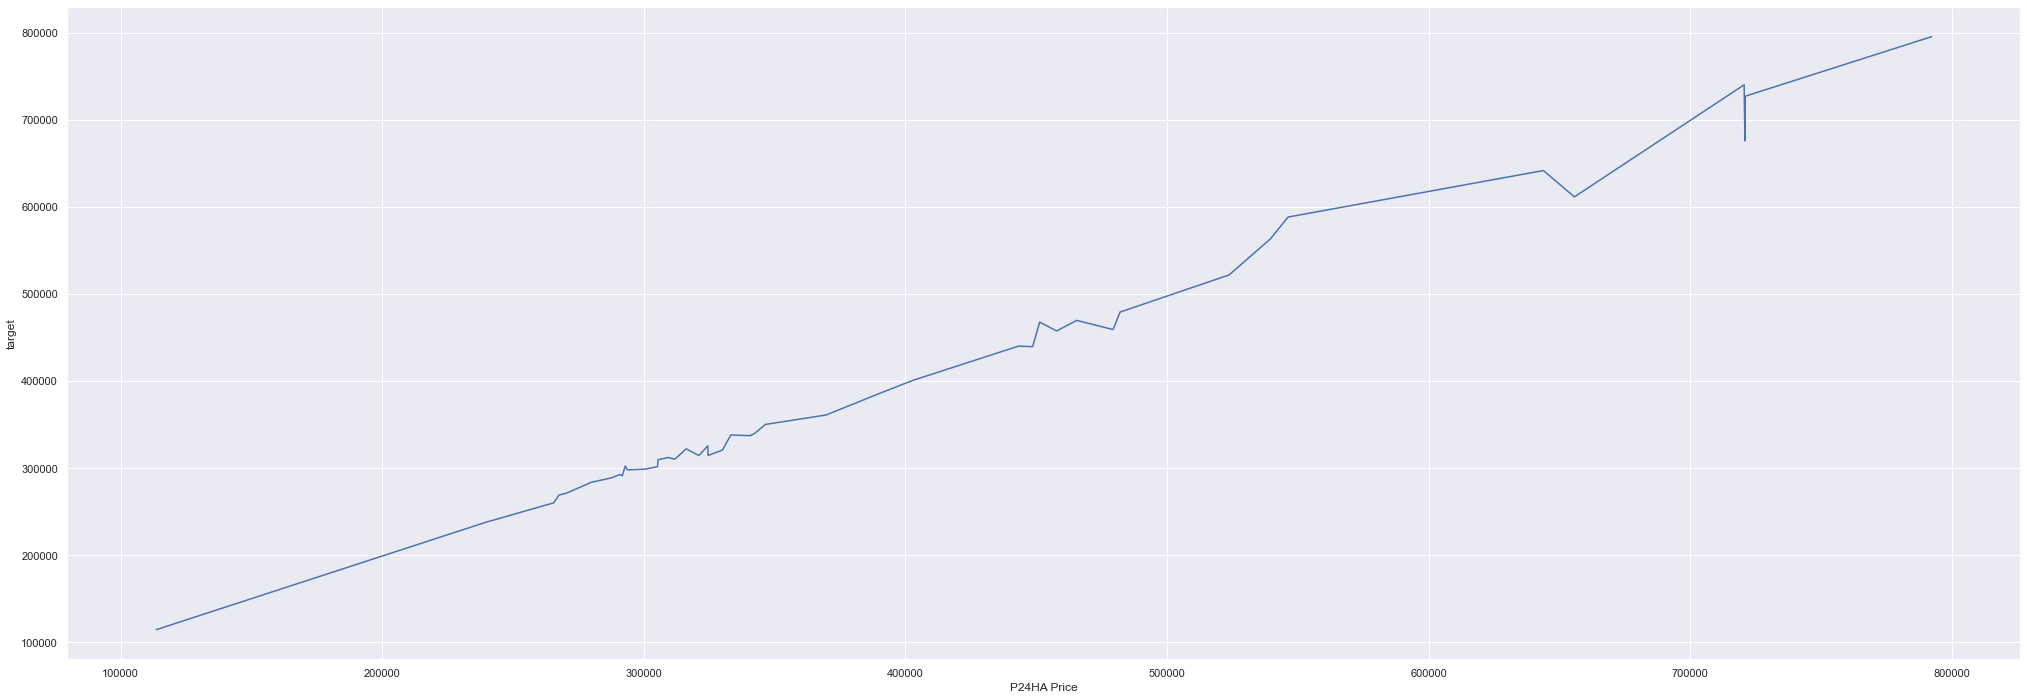

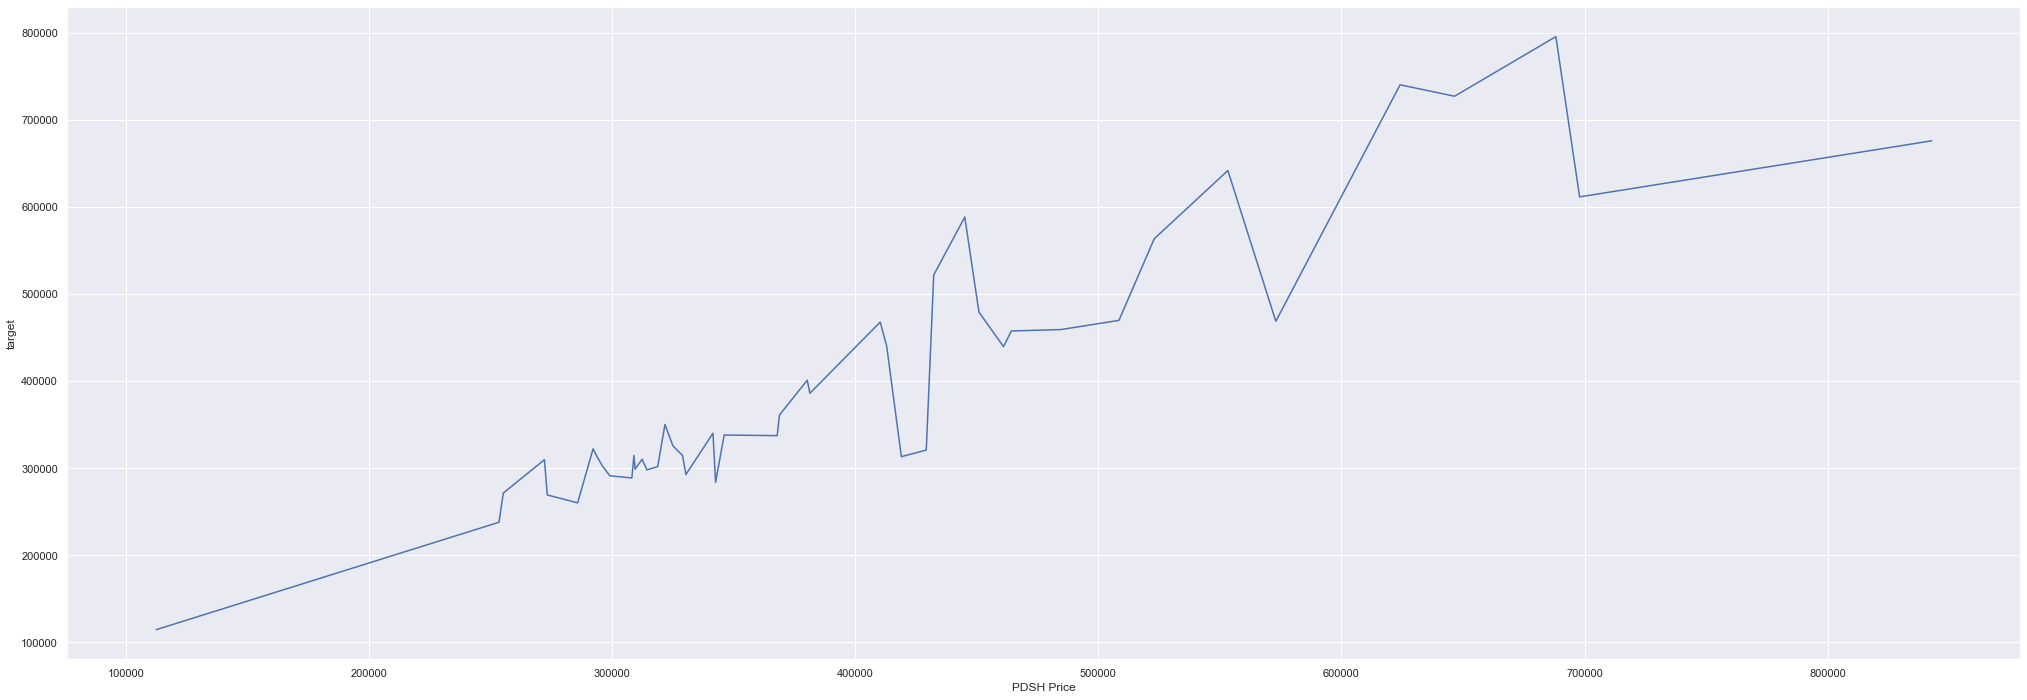

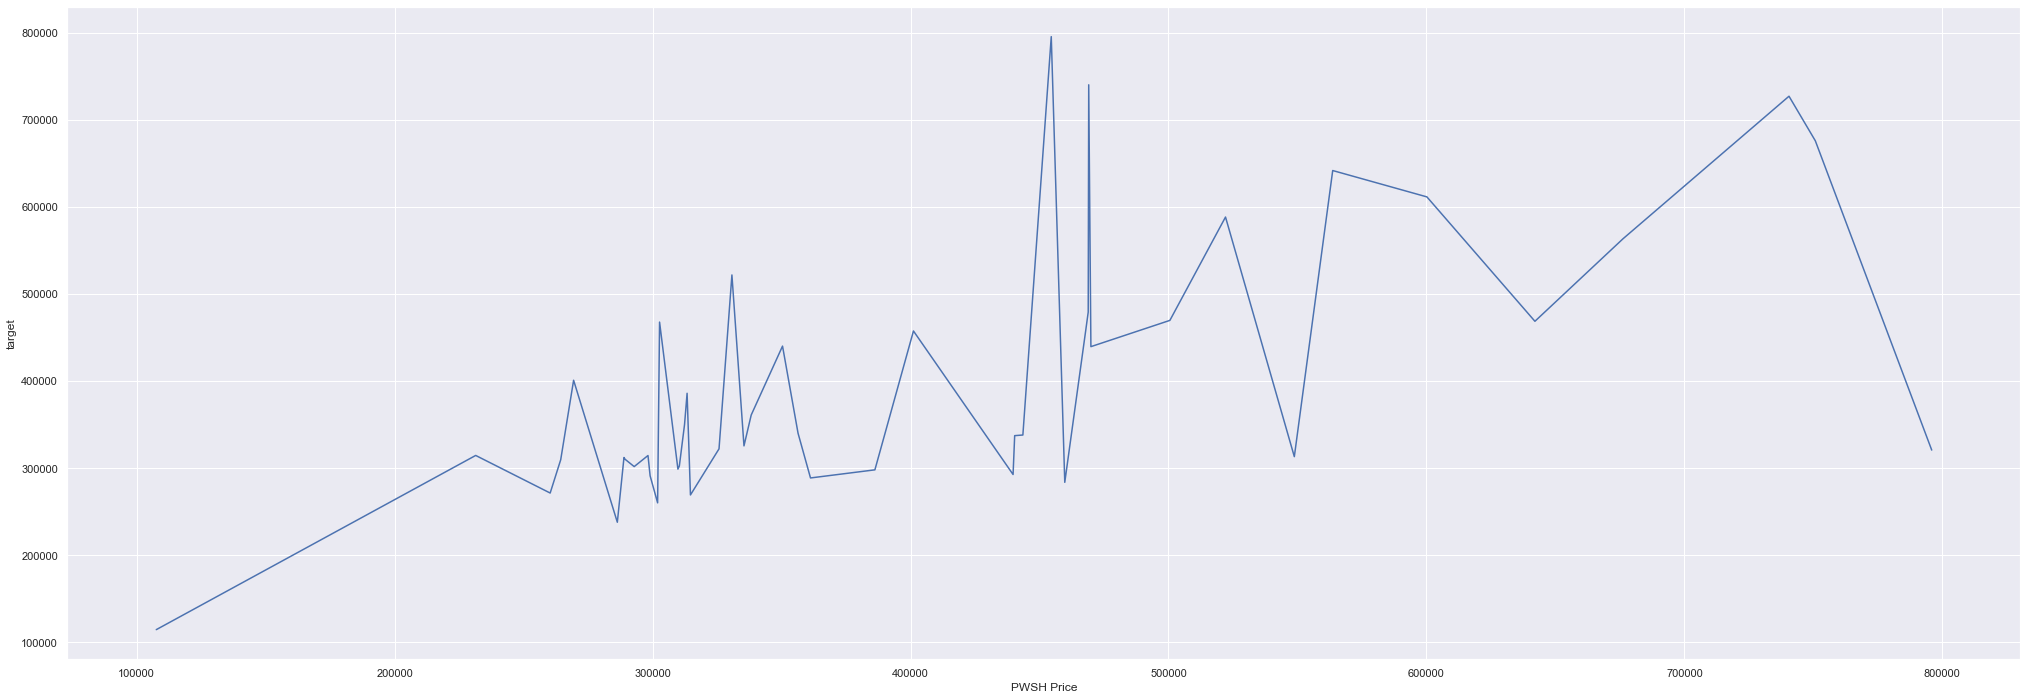

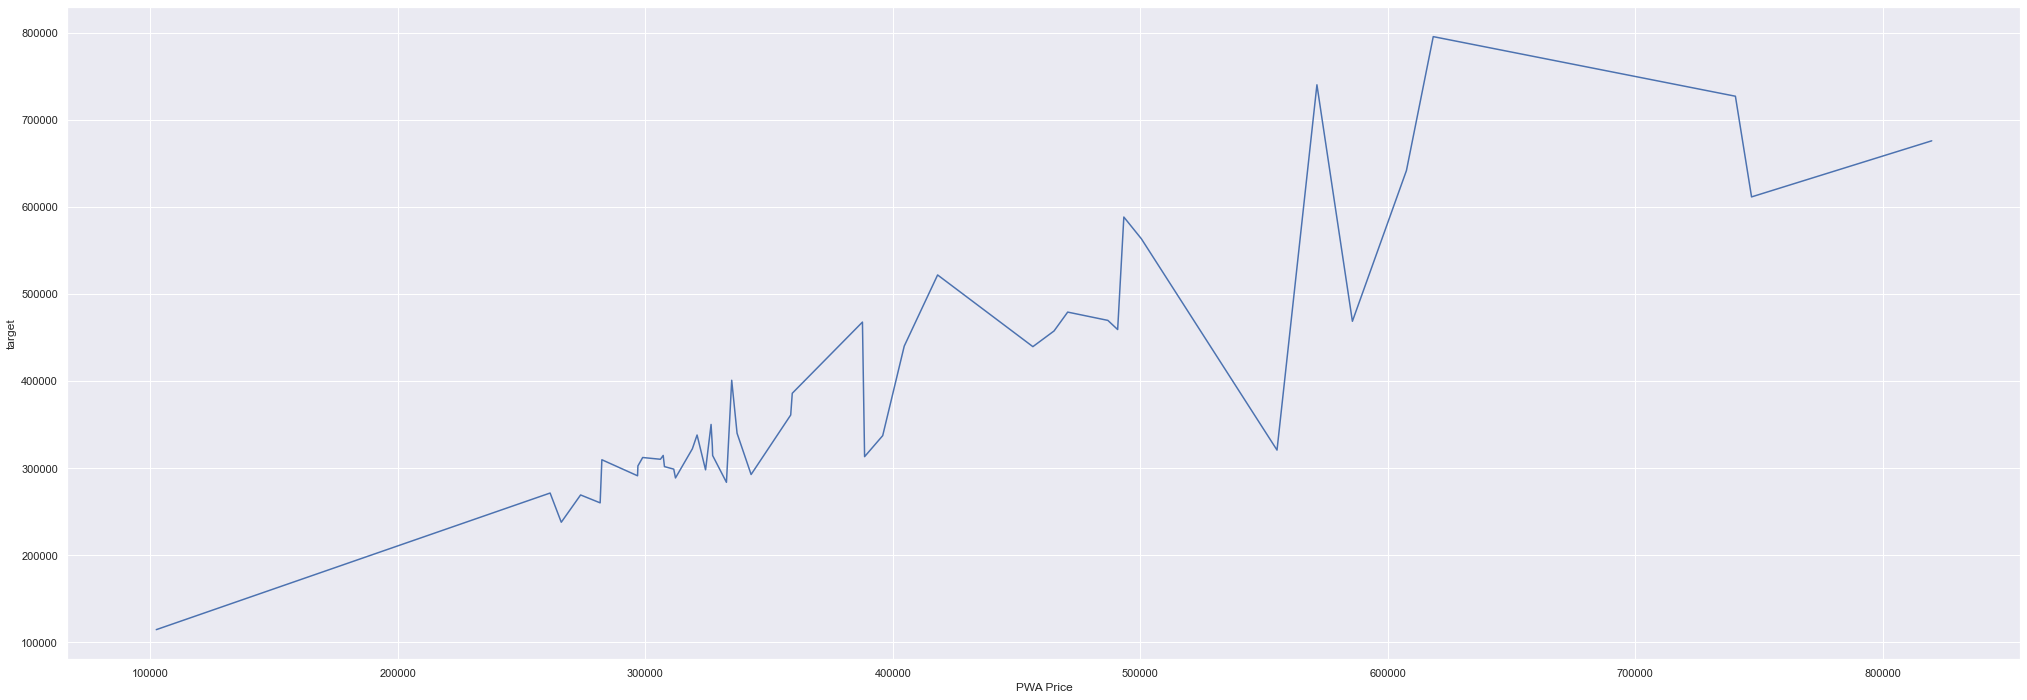

In [119]:
for col in train_df_weekly.iloc[:,3:-1]:
    sns.lineplot(col,'target',data=train_df_weekly)
    plt.show()
    
#Sgno VolumeDir doesnt seem to relate with target

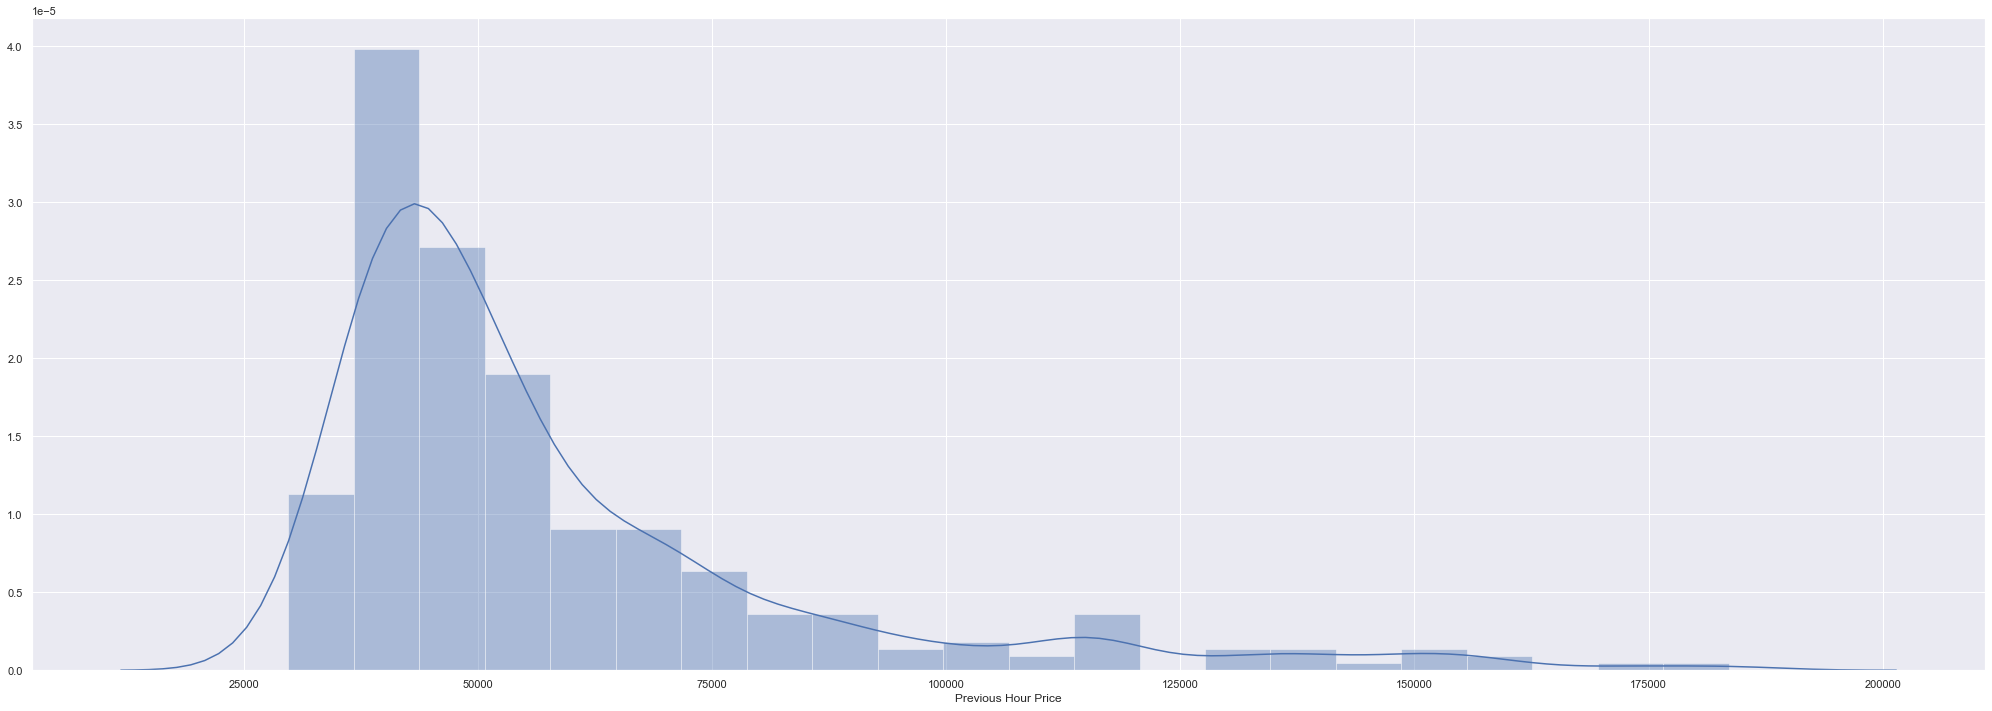

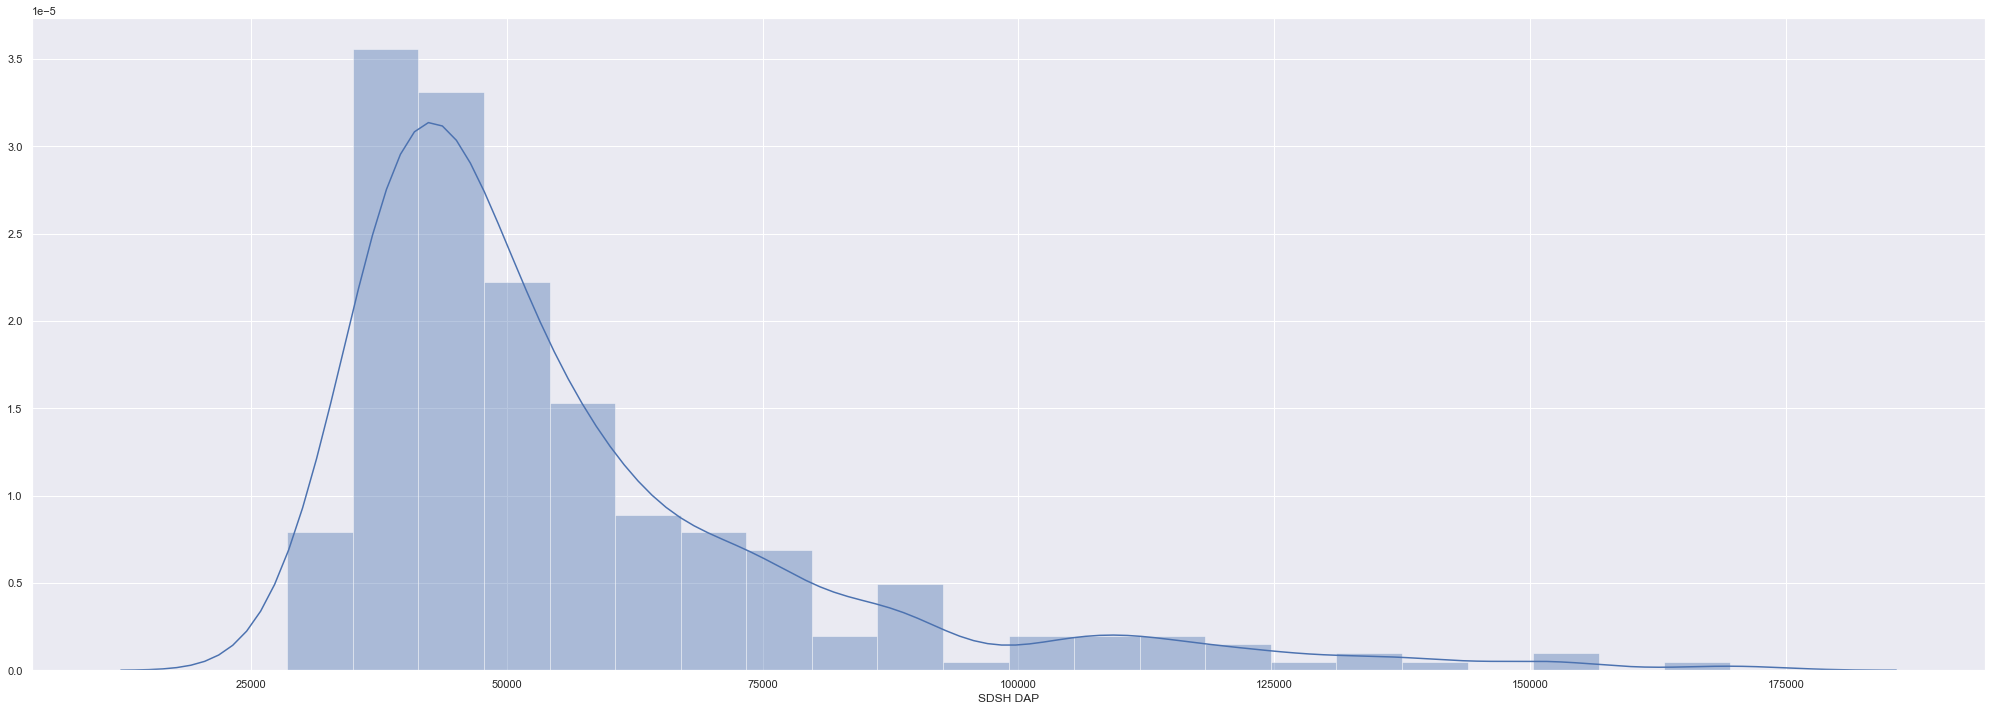

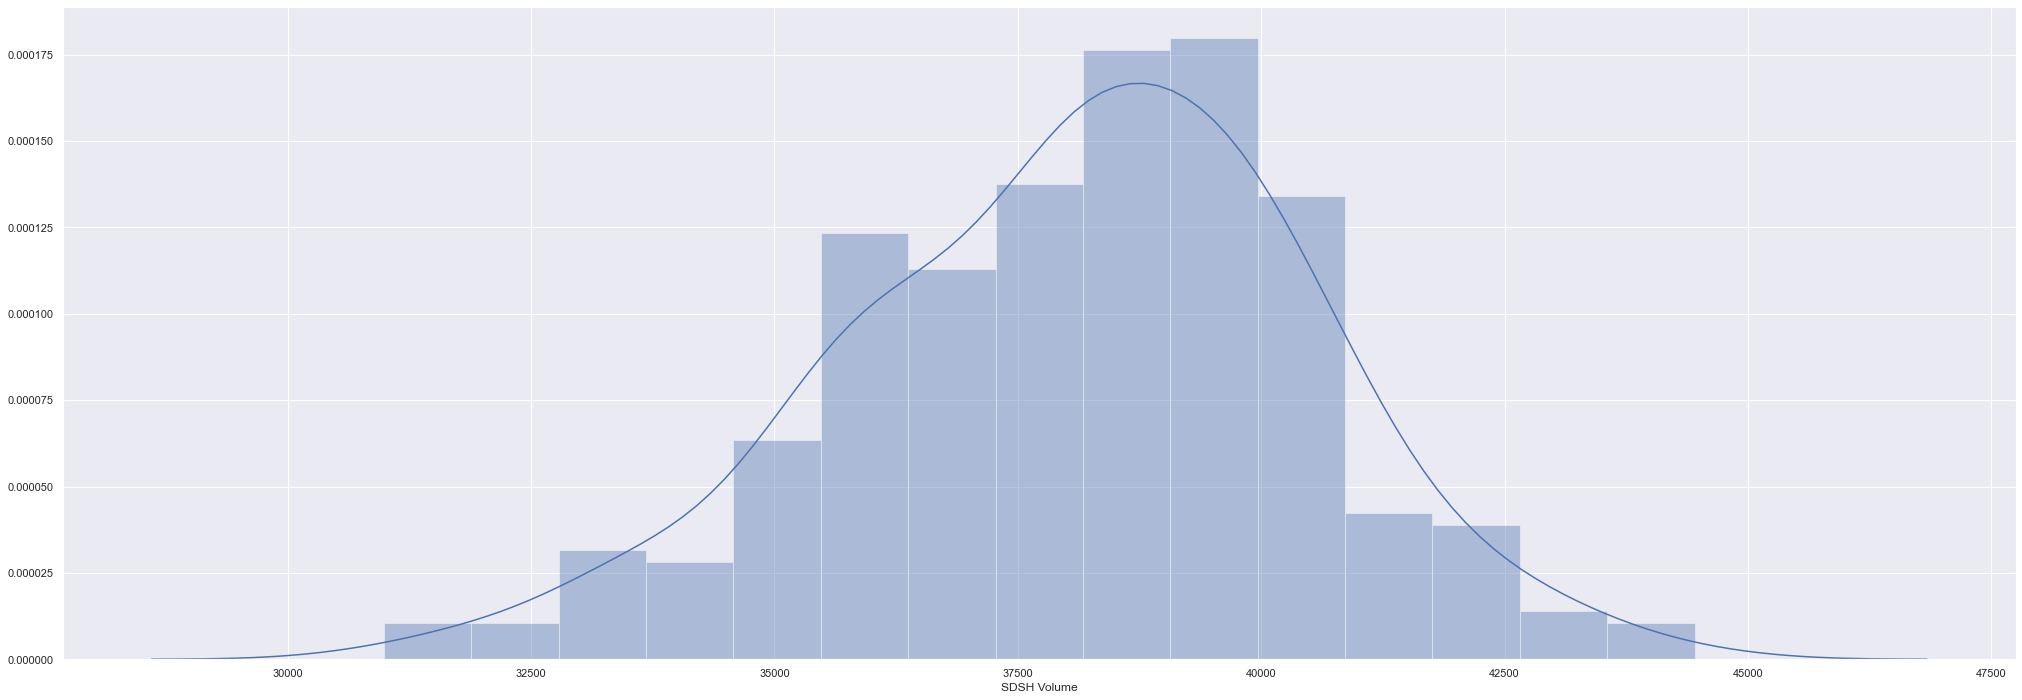

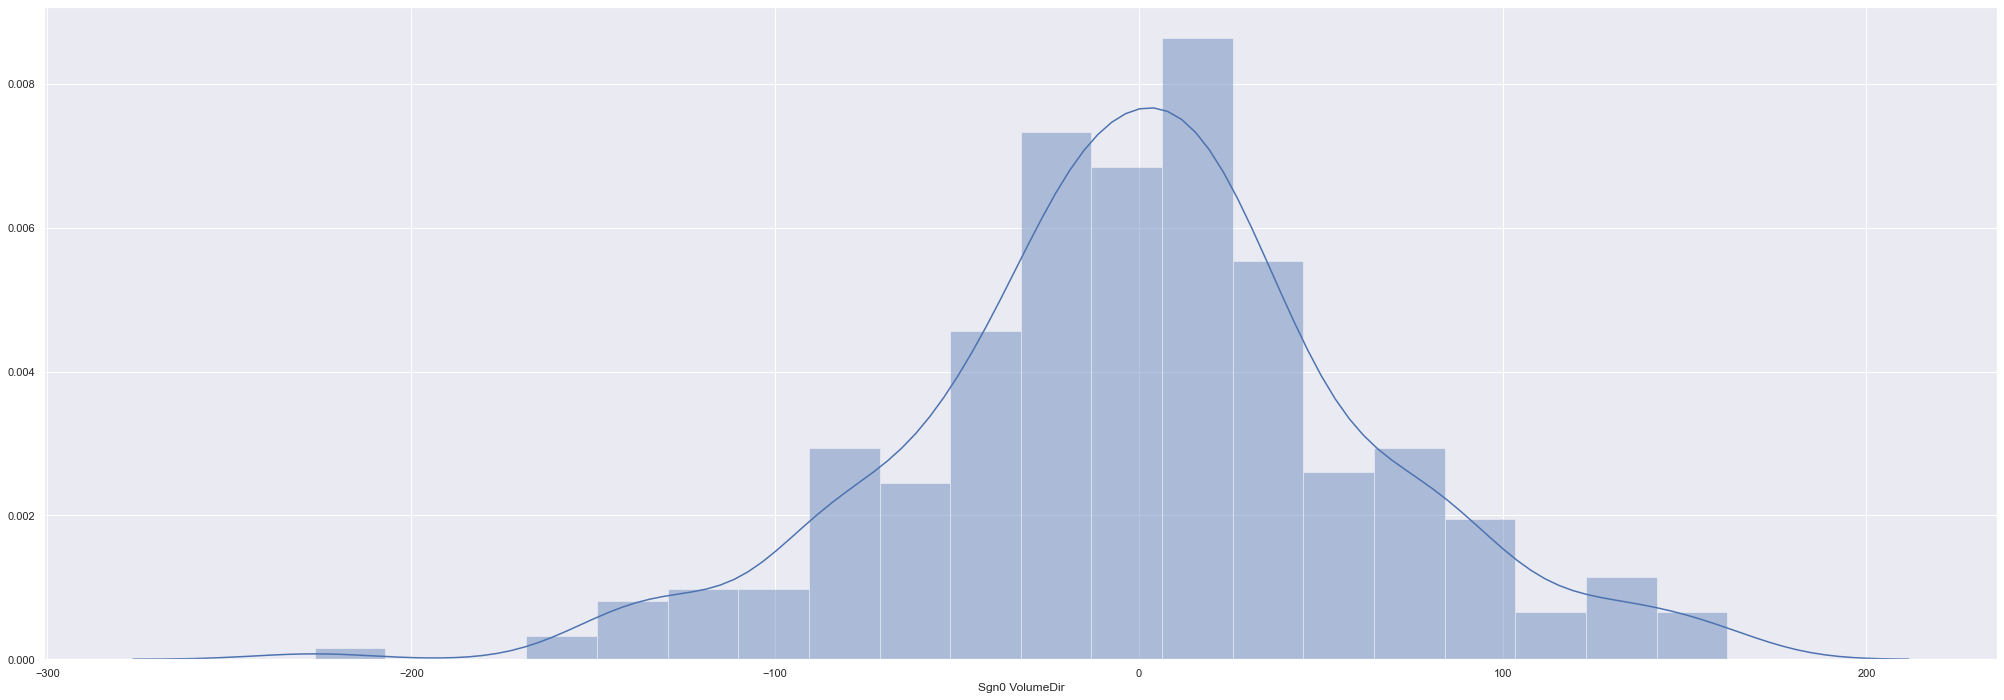

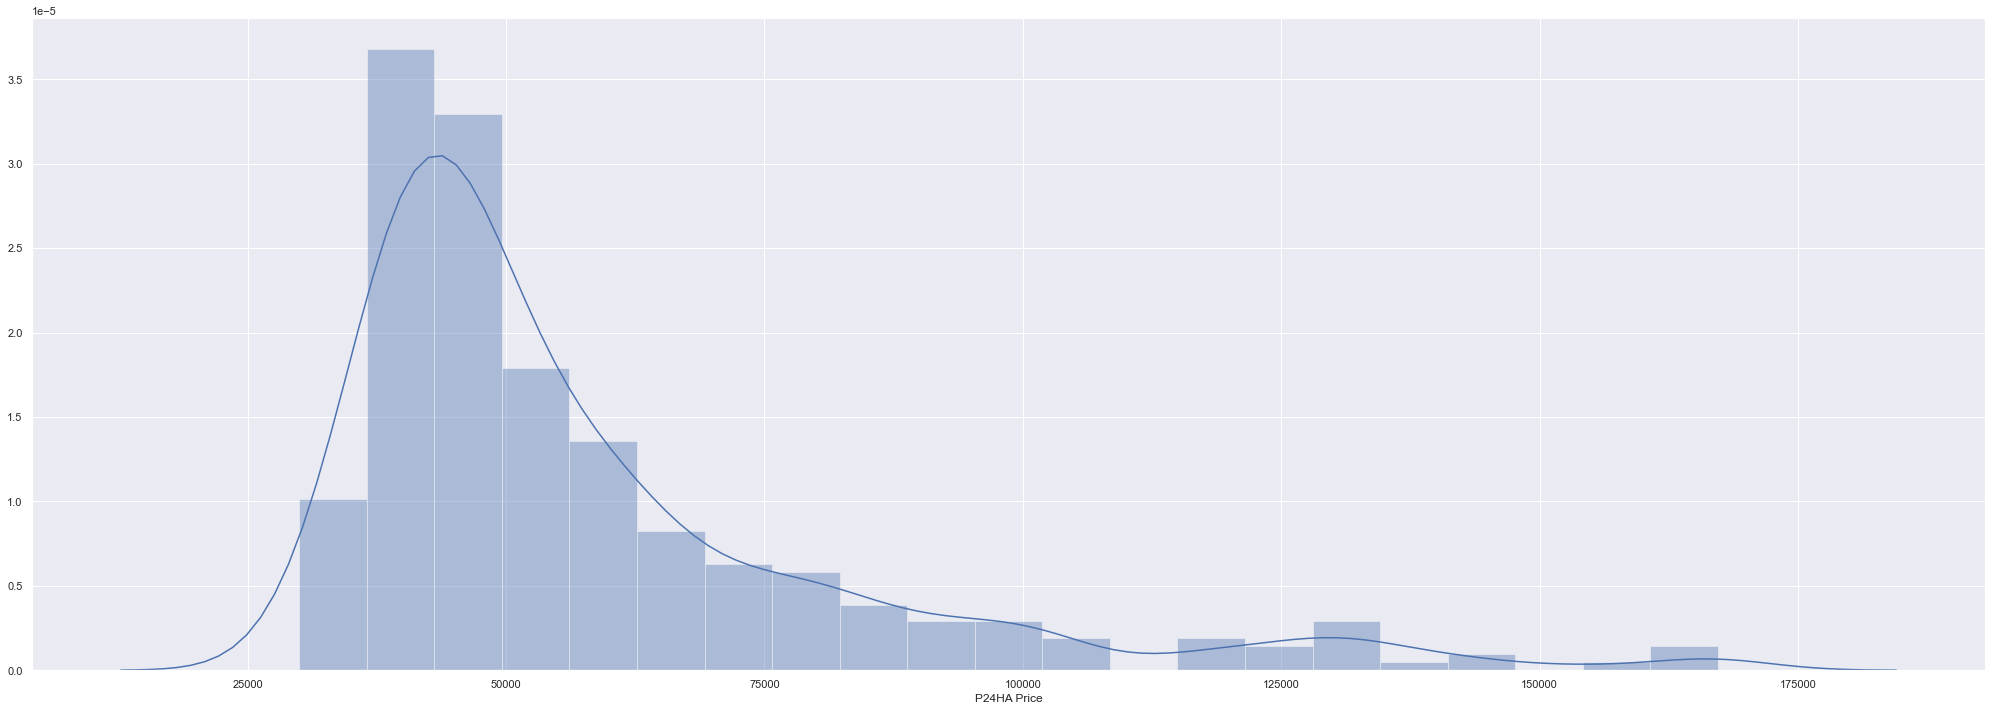

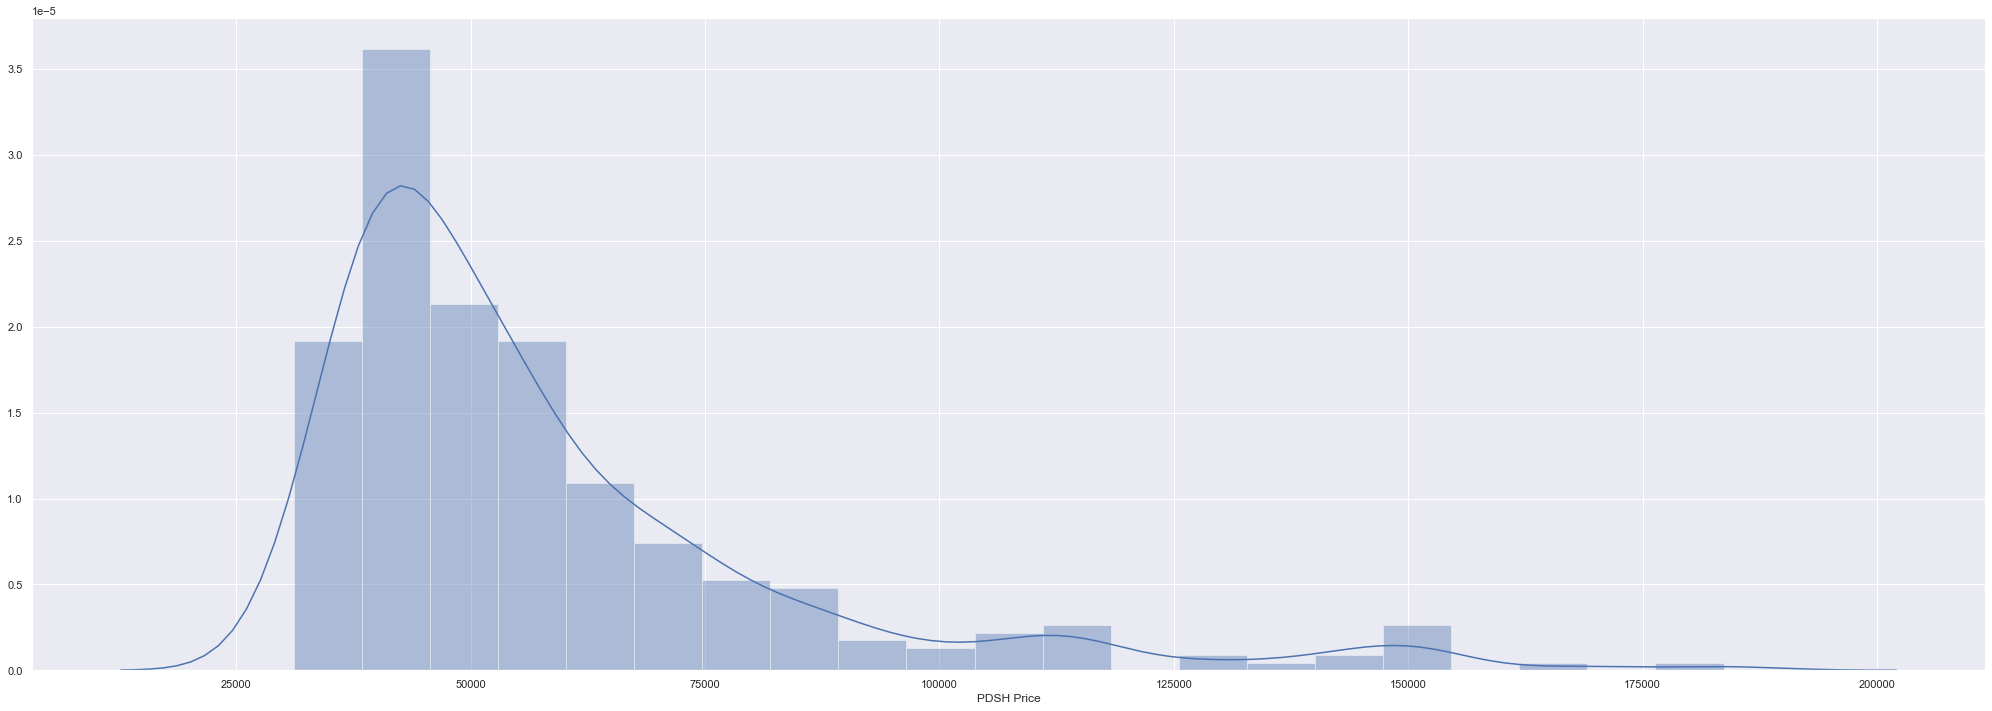

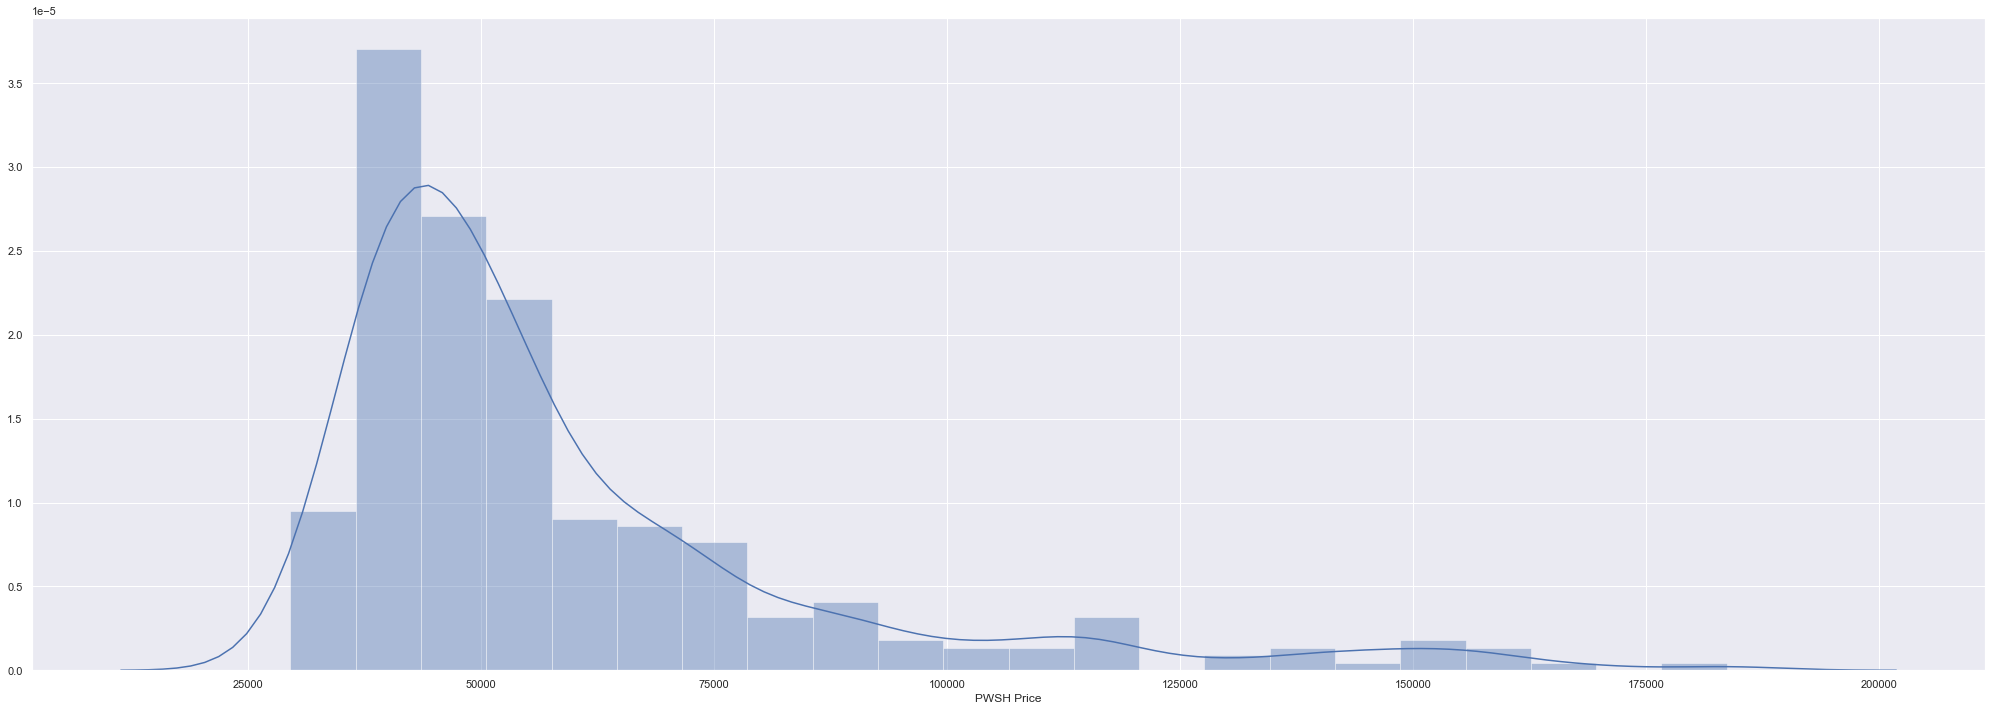

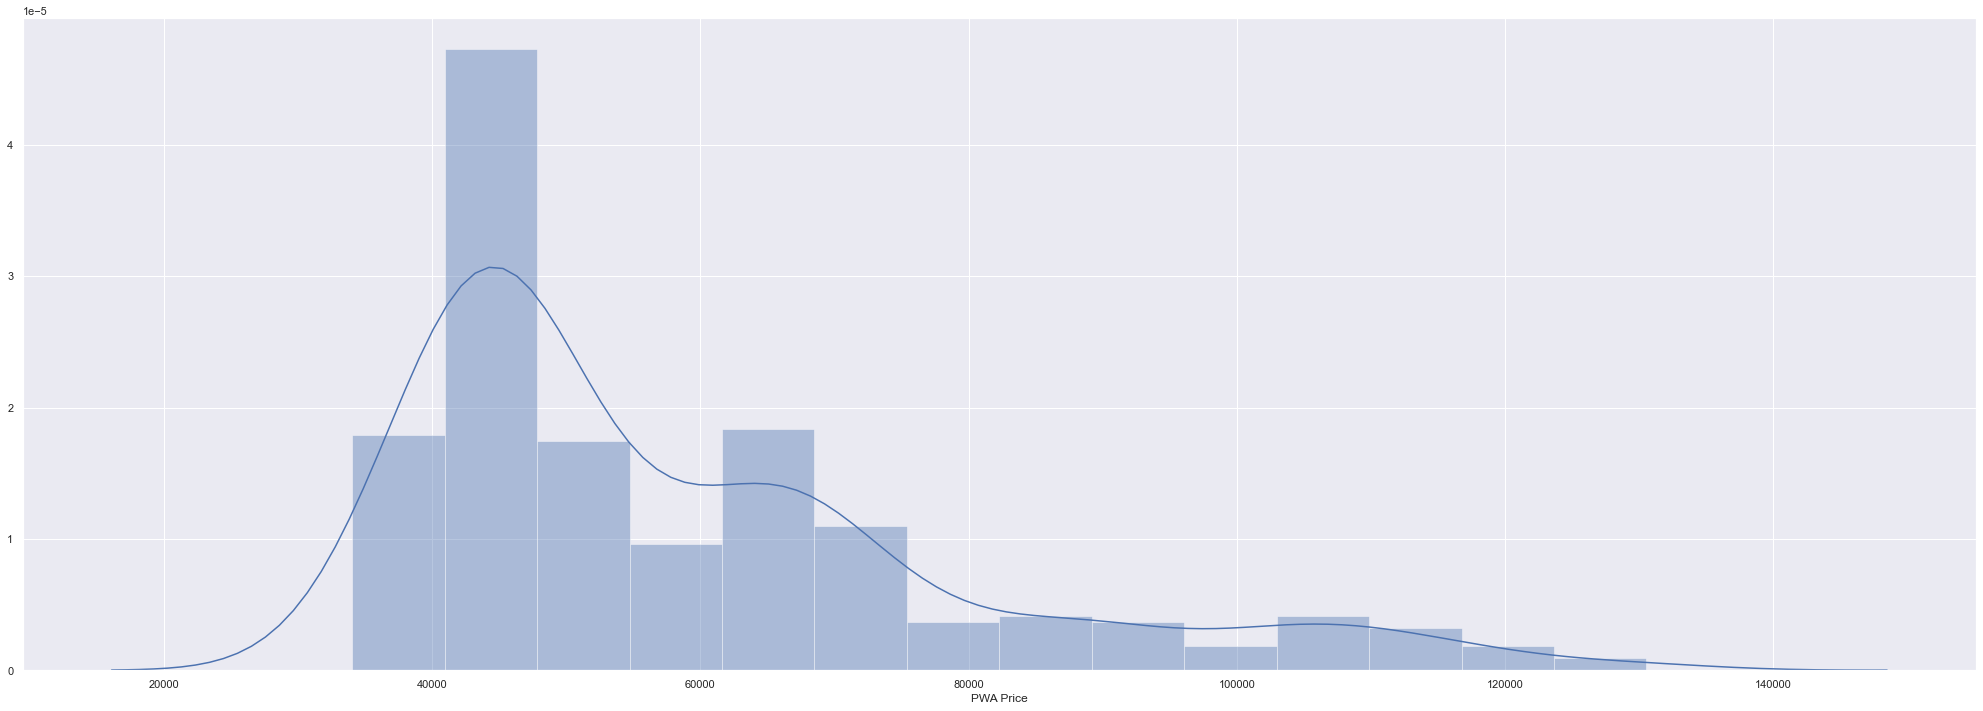

In [120]:
for col in train_df_daily.iloc[:,3:-1]:
    sns.distplot(train_df_daily[col])
    plt.show()

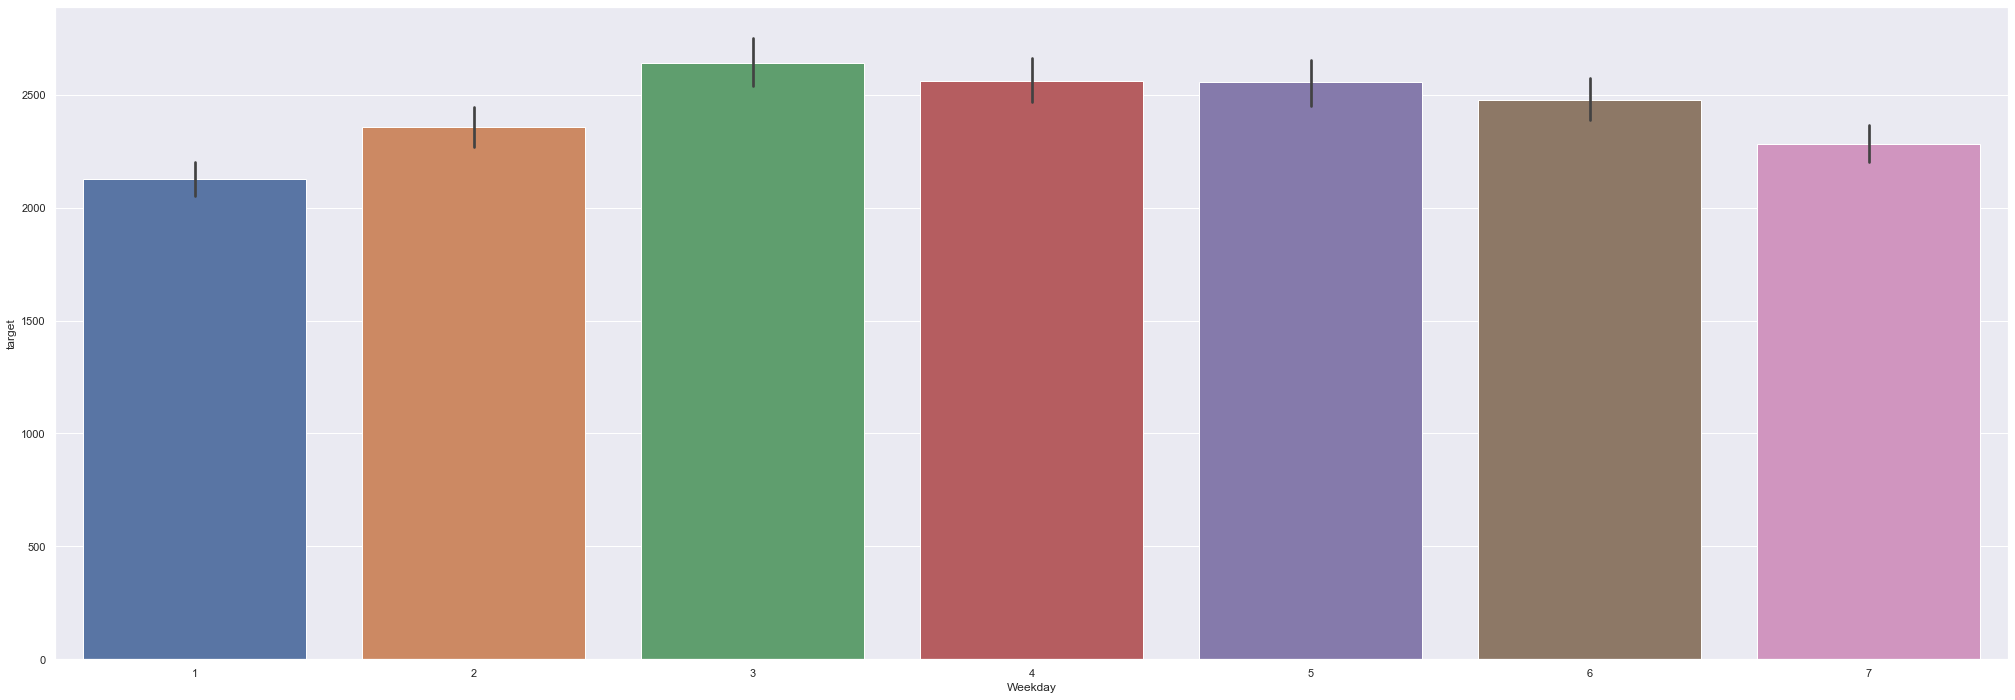

In [123]:
sns.barplot(x='Weekday',y='target',data=train_df)

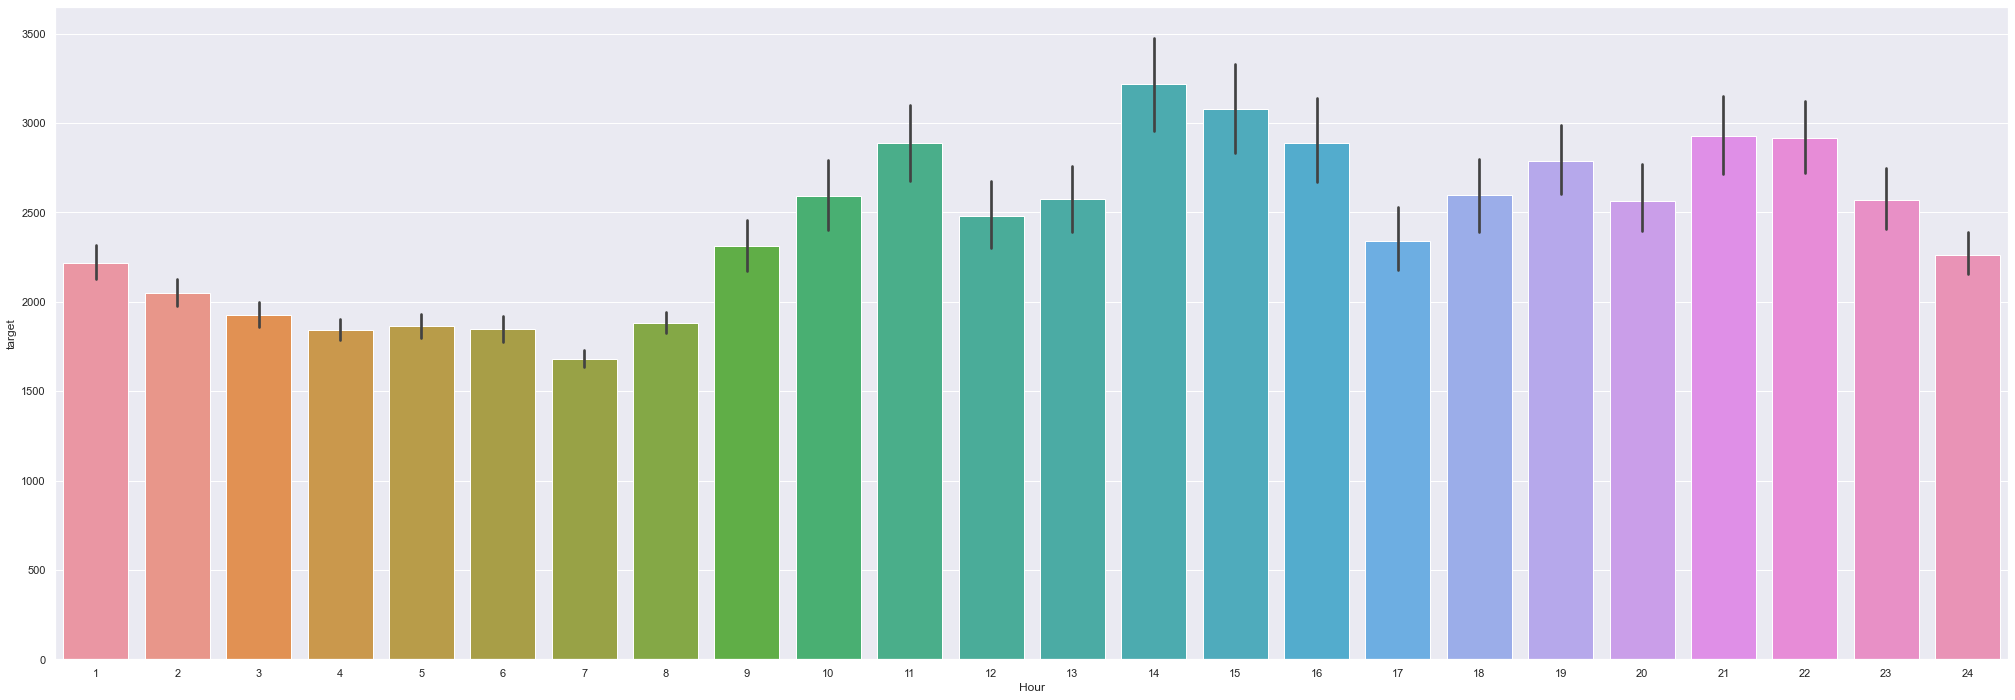

In [124]:
sns.barplot(x='Hour',y='target',data=train_df)

## scatter plot between continous feature and target variable
### as hourly data was very crowded, resampled it to daily and weekly

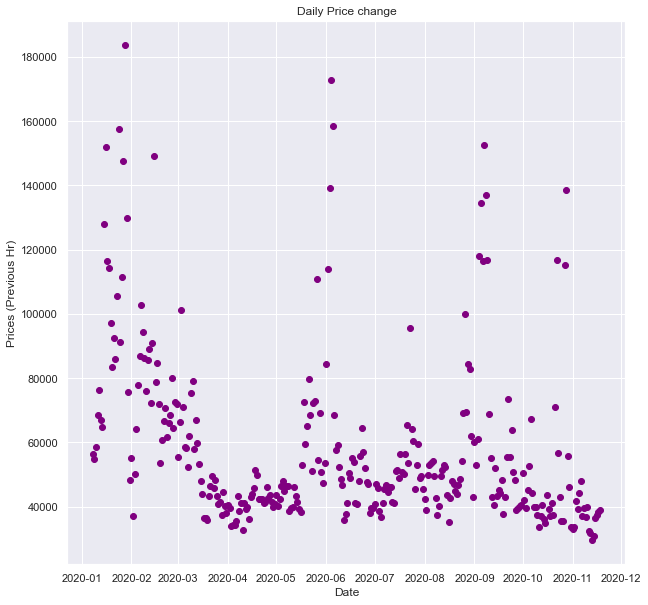

In [115]:
train_df_daily = train_df.resample('D').sum()
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(train_df_daily.index.values,
           train_df_daily['Previous Hour Price'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Prices (Previous Hr)",
       title="Daily Price change")

plt.show()

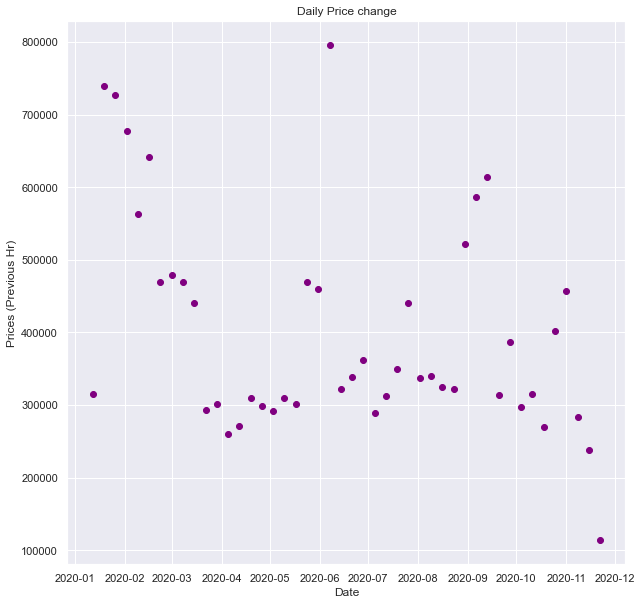

In [118]:
train_df_weekly = train_df.resample('W').sum()
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(train_df_weekly.index.values,
           train_df_weekly['Previous Hour Price'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Prices (Previous Hr)",
       title="Daily Price change")

plt.show()

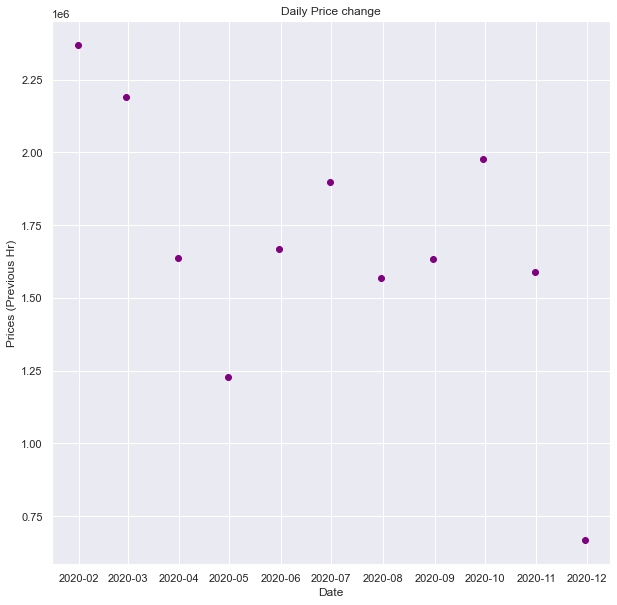

In [86]:
train_df_monthly = train_df.resample('M').sum()
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(train_df_monthly.index.values,
           train_df_monthly['Previous Hour Price'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Prices (Previous Hr)",
       title="Daily Price change")

plt.show()

In [270]:
train_df.drop(['Sgn0 VolumeDir'],axis=1,inplace=True)

In [271]:
train_df.drop(['SDSH DAP'],axis=1,inplace=True)

In [260]:
X_train,X_test,y_train,y_test = train_test_split(train_df.iloc[:,:-1],train_df['target'],test_size=0.2)

In [171]:
scaler = MinMaxScaler(feature_range=(0,1))

y = train_df.iloc[:,-1].values.reshape(-1,1)

X_train_scaled = scaler.fit_transform(train_df.iloc[:,:-1])
y_scaled = scaler.fit_transform(y)


In [197]:
pca = PCA()
X_pca = pca.fit(X_train_scaled)

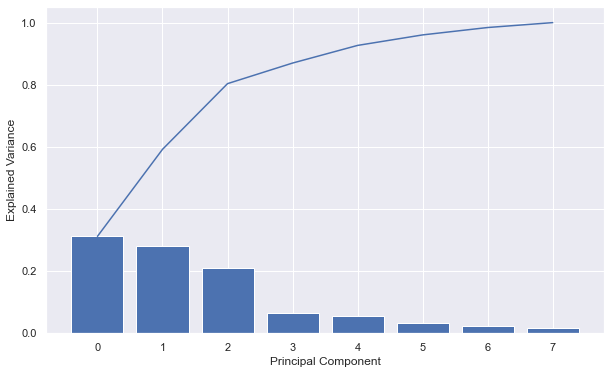

In [173]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.bar(np.arange(num_components),pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [184]:
pca = PCA(n_components=0.80)
pca.fit(X_train_scaled)
X_pca = pca.transform(scaler.transform(X_train))

In [185]:
X_train_pca = X_pca
y_train_scaled = scaler.transform(y_train.values.reshape(-1,1))

# Ensemble Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [217]:
gridsearch = {'bootstrap':[True],'max_depth':[10,250],'min_samples_leaf':[2,5],'n_estimators':[100,200]}
rf = RandomForestRegressor()

rf_gridsearch = GridSearchCV(estimator=rf,param_grid=gridsearch,cv=4,n_jobs=1)

rf_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 250],
                         'min_samples_leaf': [2, 5],
                         'n_estimators': [100, 200]})

In [218]:
print(rf_gridsearch.best_score_)
print(rf_gridsearch.best_params_)

0.750812989607644
{'bootstrap': True, 'max_depth': 250, 'min_samples_leaf': 2, 'n_estimators': 100}


In [339]:
rf = RandomForestRegressor(n_estimators=100,max_depth=250,min_samples_leaf=2,bootstrap=True,criterion='mae')
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=250, min_samples_leaf=2)

In [340]:
prediction = rf.predict(X_test)
prediction = pd.DataFrame(prediction)

prediction['actual'] = y_test.values

In [241]:
prediction

,prediction,actual
0,9806.033769,10117.855409
1,2662.369550,1714.390000
2,3970.394885,7060.510000
3,2088.809250,2062.680000
4,3200.456600,3317.900000
...,...,...
1512,2229.117300,2710.050000
1513,1770.687033,1856.970000
1514,808.809932,1808.180000
1515,3128.703550,2694.570000


In [342]:
prediction.rename(columns = {0:'prediction'},inplace=True)
prediction['difference'] = np.abs(prediction['actual'] - prediction['prediction'])
prediction['% error'] = ((prediction['difference'] + 0.5) /(prediction['actual'] + 0.5))*100

prediction['% error'].mean()

13.647554551657624

# Feature selection by randomforest

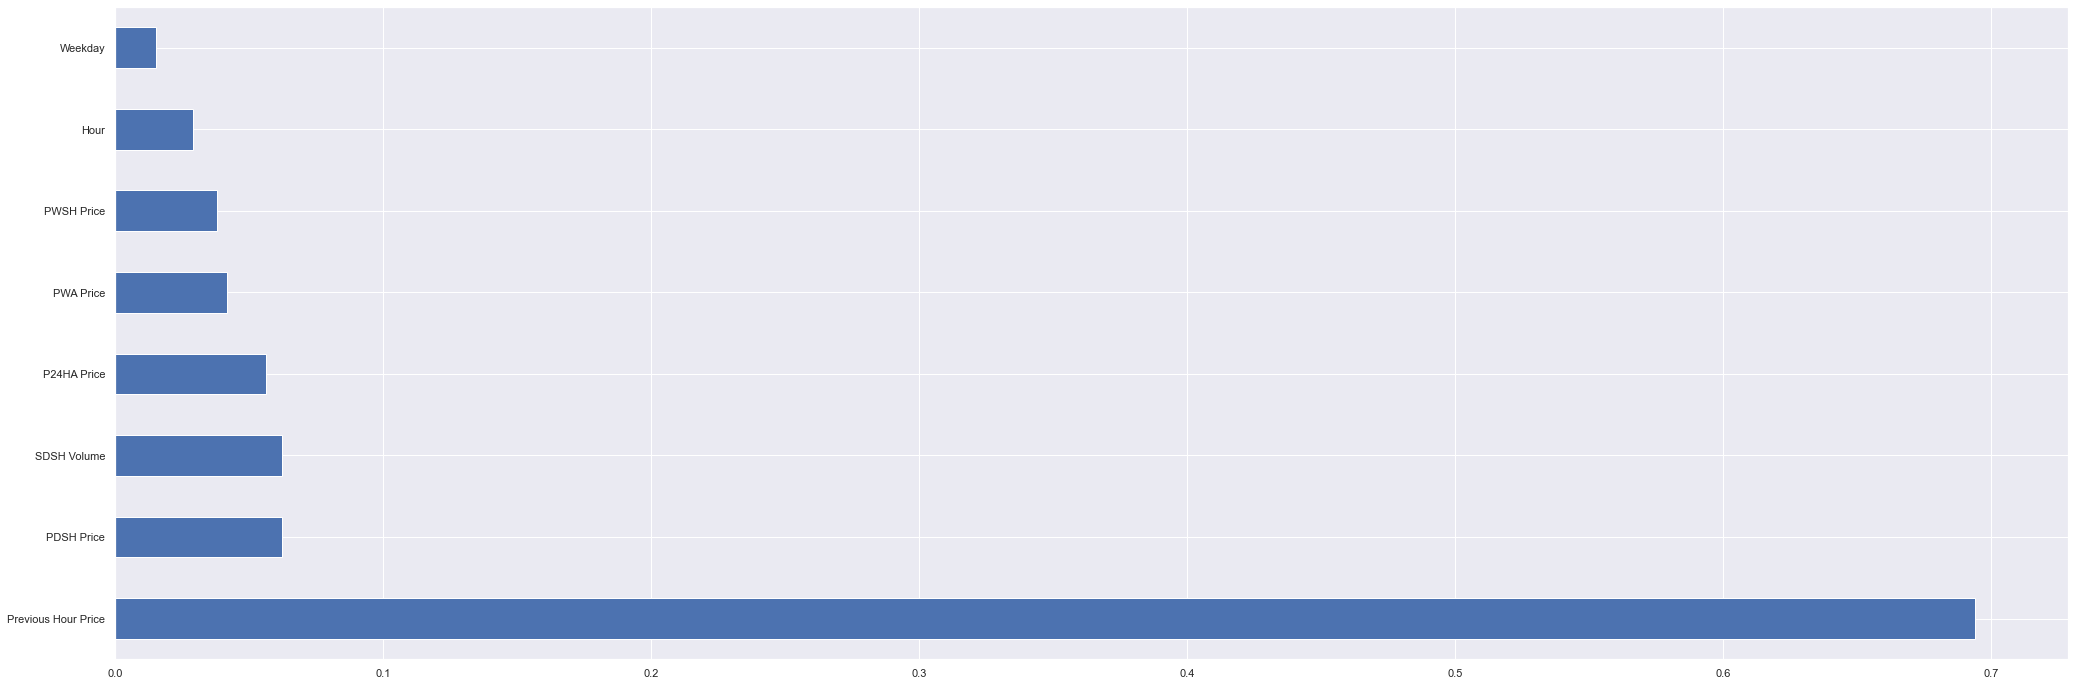

In [228]:
feat_importances = pd.Series(rf.feature_importances_,index=train_df.iloc[:,:-1].columns)
feat_importances.nlargest(8).plot(kind='barh')


In [232]:
feat_importances.sort_values(ascending=False) #we can drop Hour and weekday

Previous Hour Price    0.693977
PDSH Price             0.062430
SDSH Volume            0.062405
P24HA Price            0.056416
PWA Price              0.042026
PWSH Price             0.038225
Hour                   0.029069
Weekday                0.015451
dtype: float64

# Ensemble xgboost

In [245]:
!pip install xgboost

In [254]:
import xgboost as xgb
from xgboost import plot_importance,plot_tree

In [272]:
train_df.drop(['Hour','Weekday'],axis=1,inplace=True)

In [317]:
X_train,X_test,y_train,y_test = train_test_split(train_df.iloc[:,:-1],train_df['target'],test_size=0.2)

In [255]:
xgb1 = xgb.XGBRegressor()

parameters = {'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,500, 1000],
             'n_jobs' : [-1]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[20:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7651002937267363
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'n_jobs': -1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [337]:
xgbbest = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=4, n_estimators=100, n_jobs=-1, subsample=0.7)

xgbbest.fit(X_train,y_train)
predictionsxgb = xgbbest.predict(X_test)

predictionsxgb = pd.DataFrame(predictionsxgb)

predictionsxgb['actual'] = y_test.values

predictionsxgb.rename(columns = {0:'prediction'},inplace=True)

predictionsxgb['difference'] = np.abs(predictionsxgb['actual'] - predictionsxgb['prediction'])
predictionsxgb['% error'] = ((predictionsxgb['difference'] + 0.5) /(predictionsxgb['actual'] + 0.5))*100

predictionsxgb['% error'].mean()

C:\Users\sahus\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


13.682643184110887

# Deep learning Model

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [318]:
np.random.seed(42)
tf.random.set_seed(42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [384]:
model1 = Sequential()
model1.add(Dense(6,activation='relu'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

In [385]:
model1.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
48/48 [==============================] - 1s 5ms/step - loss: 8198163.6122 - val_loss: 8772451.0000
Epoch 2/400
48/48 [==============================] - 0s 2ms/step - loss: 8182637.5816 - val_loss: 8766228.0000
Epoch 3/400
48/48 [==============================] - 0s 2ms/step - loss: 8419192.3673 - val_loss: 8747124.0000
Epoch 4/400
48/48 [==============================] - 0s 2ms/step - loss: 8320250.3776 - val_loss: 8693501.0000
Epoch 5/400
48/48 [==============================] - 0s 2ms/step - loss: 8345640.1837 - val_loss: 8548429.0000
Epoch 6/400
48/48 [==============================] - 0s 2ms/step - loss: 8029390.8265 - val_loss: 8203191.0000
Epoch 7/400
48/48 [==============================] - 0s 2ms/step - loss: 7718701.7041 - val_loss: 7508313.5000
Epoch 8/400
48/48 [==============================] - 0s 2ms/step - loss: 6589167.5714 - val_loss: 6354450.5000
Epoch 9/400
48/48 [==============================] - 0s 2ms/step - loss: 5876955.9286 - val_loss: 4771859.0000
E

KeyboardInterrupt: 

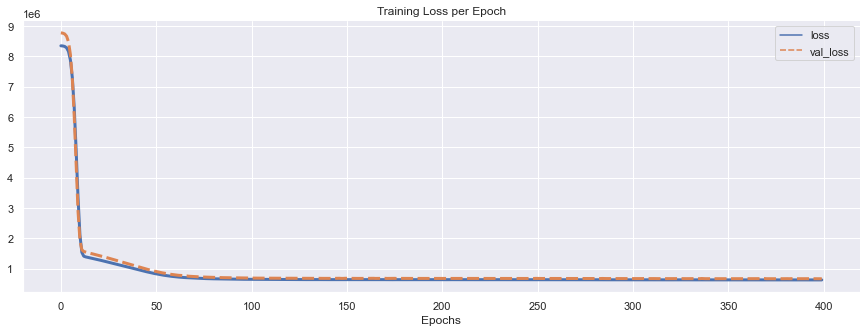

In [323]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [330]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  385.8473707992405
MSE:  661819.430606308
RMSE:  813.5228519263045


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

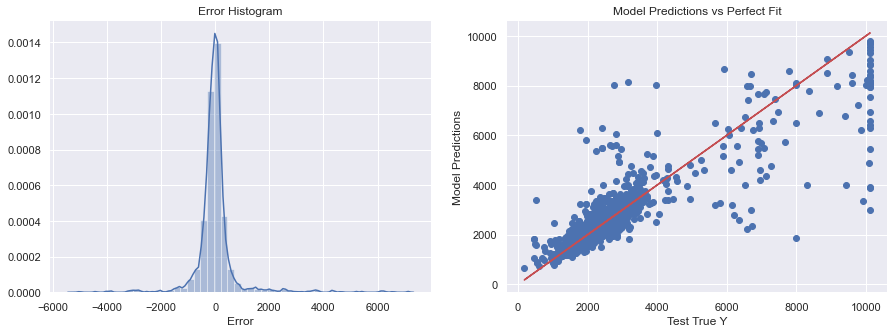

In [329]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1517, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [332]:
predictions = model.predict(X_test)

predictions = pd.DataFrame(predictions)

predictions['actual'] = y_test.values

predictions.rename(columns = {0:'prediction'},inplace=True)

predictions['difference'] = np.abs(predictions['actual'] - predictions['prediction'])
predictions['% error'] = ((predictions['difference'] + 0.5) /(predictions['actual'] + 0.5))*100

predictions['% error'].mean()

15.05772120903902

In [334]:
prediction.drop(['difference','% error'],axis=1,inplace=True)

# save results to csv

In [343]:
prediction.to_csv(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\rf_results.csv")

In [358]:
test_df.drop(['Is Working Day'],axis=1,inplace=True)
test_df.reset_index(drop=True,inplace=True)
test_df.set_index('Date',inplace=True)
test_df.drop(['Sgn0 VolumeDir'],axis=1,inplace=True)
test_df.drop(['SDSH DAP'],axis=1,inplace=True)

In [361]:
test_df.drop(['Hour','Weekday'],axis=1,inplace=True)
scaler = MinMaxScaler()
test_X = scaler.fit_transform(test_df.iloc[:,:-1])

In [370]:
predictions = rf.predict(X_test)

predictions = pd.DataFrame(predictions)

predictions['actual'] = y_test.values

predictions.rename(columns = {0:'prediction'},inplace=True)

predictions['difference'] = np.abs(predictions['actual'] - predictions['prediction'])
predictions['% error'] = ((predictions['difference'] + 0.5) /(predictions['actual'] + 0.5))*100

print(predictions['% error'].mean())

predictions.to_csv(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\rf_results.csv")

13.647554551657624


In [371]:
predictions = xgbbest.predict(X_test)

predictions = pd.DataFrame(predictions)

predictions['actual'] = y_test.values

predictions.rename(columns = {0:'prediction'},inplace=True)

predictions['difference'] = np.abs(predictions['actual'] - predictions['prediction'])
predictions['% error'] = ((predictions['difference'] + 0.5) /(predictions['actual'] + 0.5))*100

print(predictions['% error'].mean())

predictions.to_csv(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\xgb_results.csv")

13.682643184110887


C:\Users\sahus\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [372]:
predictions = model.predict(X_test)

predictions = pd.DataFrame(predictions)

predictions['actual'] = y_test.values

predictions.rename(columns = {0:'prediction'},inplace=True)

predictions['difference'] = np.abs(predictions['actual'] - predictions['prediction'])
predictions['% error'] = ((predictions['difference'] + 0.5) /(predictions['actual'] + 0.5))*100

print(predictions['% error'].mean())

predictions.to_csv(r"C:\Users\sahus\Desktop\Python\datasets\New folder\New folder\dnn_results.csv")

15.05772120903902


#  Save models

In [379]:
file_name = r'C:\Users\sahus\PycharmProjects\predict_electricity\rf_model.sav'

pickle.dump(rf, open(file_name, 'wb'))

In [380]:
file_name = r'C:\Users\sahus\PycharmProjects\predict_electricity\xgb_model.sav'

pickle.dump(xgbbest,open(file_name,'wb'))

In [ ]:
file_name = r'C:\Users\sahus\PycharmProjects\predict_electricity\dnn_model.sav'

pickle.dump(model,open(file_name,'wb'))